#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
%matplotlib inline
sns.set(font_scale=1.5)

#IMPORTING DATA

In [ ]:
data=pd.read_csv('PowerGeneration.csv',header=0)
data

Dates      Power Station  Monitored Cap.(MW)  \
0       01-09-2017              Delhi              2235.4   
1       01-09-2017            Haryana              2720.0   
2       01-09-2017   Himachal Pradesh              3378.0   
3       01-09-2017  Jammu and Kashmir              1285.0   
4       01-09-2017             Punjab              3826.3   
...            ...                ...                 ...   
345268  13-04-2022            Tripura               137.0   
345269  13-04-2022            NEEPCO.              2027.0   
345270  13-04-2022               NHPC               105.0   
345271  13-04-2022          NTPC Ltd.               750.0   
345272  13-04-2022               ONGC               726.6   

        Total Cap. Under Maintenace (MW)  Planned Maintanence (MW)  \
0                                 135.00                      0.00   
1                                2470.00                      0.00   
2                                 379.00                      0.00   
3                                 150.00                      0.00   
4                                2697.65                     77.65   
...                                  ...                       ...   
345268                             32.00                      0.00   
345269                            963.50                    313.50   
345270                             35.00                      0.00   
345271                            250.00                      0.00   
345272                              0.00                      0.00   

        Forced Maintanence(MW)  Other Reasons (MW)  Programme or Expected(MU)  \
0                        135.0                   0                         13   
1                       2470.0                   0                         28   
2                        231.0                   0                         40   
3                          0.0                   0                         14   
4                       2620.0                   0                         39   
...                        ...                 ...                        ...   
345268                     0.0                  32                          0   
345269                   650.0                   0                          0   
345270                    35.0                   0                          0   
345271                   250.0                   0                          0   
345272                     0.0                   0                          0   

        Actual(MU)  Excess(+) / Shortfall (-)  Deviation  
0               18                       5.00        0.0  
1                7                     -21.80        0.0  
2               46                       5.63        0.0  
3               23                       9.43        0.0  
4               17                     -21.69        0.0  
...            ...                        ...        ...  
345268           1                       0.29        0.0  
345269          12                      -1.59        0.0  
345270           0                      -0.72        0.0  
345271          11                       4.45        0.0  
345272          13                       1.80        0.0  

[345273 rows x 11 columns]

#UNDERSTANDING THE DATA

In [ ]:
data.isna().sum()  #to check null values

Dates                               0
Power Station                       0
Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
Programme or Expected(MU)           0
Actual(MU)                          0
Excess(+) / Shortfall (-)           0
Deviation                           0
dtype: int64

In [ ]:
data.shape

(345273, 11)

In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].unique())

['01-09-2017' '02-09-2017' '03-09-2017' ... '11-04-2022' '12-04-2022'
 '13-04-2022']
['Delhi' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir' 'Punjab'
 'Rajasthan' 'Uttarakhand' 'Uttar Pradesh' 'ADHPL' 'AHPC (GVK)' 'APCPL'
 'APL' 'BEPL' 'DAE' 'E.P.P.L.' 'GBHPPL' 'GIPL' 'GPGSL (GVK)' 'HBPCL'
 'HSPCL' 'IAEPL' 'JhPL(HR)' 'JPPVL' 'LAPPL' 'LPGCL' 'MPCL' 'MUNPL' 'NDPL'
 'NHPC' 'NLC' 'NPCIL' 'NPL' 'NTPC Ltd.' 'NTPGPL' 'PPGCL (Jaypee)' 'RPSCL'
 'RWPL (JSW)' 'SJVNL' 'SrEPL' 'THDC' 'TSPL' 'Chhatisgarh' 'Gujarat'
 'Madhya Pradesh' 'Maharashtra' 'ACB' 'AMNEPL' 'BALCO' 'BLAPPL' 'CGPL'
 'CLPINDIA' 'DBPCL' 'DIPL' 'DLHP' 'EPGL' 'ESSAR' 'ESSARPMPL' 'GCEL' 'GEPL'
 'GIPCL' 'GMR ENERG' 'IEPL' 'JHAPL' 'JPL' 'JSWEL' 'KWPCL' 'LANCO' 'LVTPL'
 'MBPMPL' 'MCCPL' 'NHDC' 'NSPCL' 'PGPL' 'RATTANINDIA' 'RELIANCE' 'RGPPL'
 'RIL (DAHANU)' 'RKMPPL' 'SCPL' 'SKS' 'SMHPCL' 'SPL' 'SVPPL' 'TATA MAH.'
 'TATA PCL' 'TOR. POW. (SUGEN)' 'TOR. POW. (UNOSUGEN)' 'TRNE' 'VESPL'
 'VIP' 'VVL' 'WPCL' 'Andhra Pradesh' 'Karnataka' 'Keral

In [ ]:
for i in range(data.shape[1]):
    print(data.iloc[:,i].value_counts())

18-03-2020    13050
02-04-2018      528
25-11-2017      352
13-04-2022      182
14-09-2022      182
              ...  
18-07-2019      173
30-06-2019      173
12-06-2019      173
25-05-2019      172
07-05-2019      172
Name: Dates, Length: 1857, dtype: int64
NTPC Ltd.          9570
NHPC               5742
NPCIL              5742
GMR ENERG          5742
JSWEL              3828
                   ... 
Andhra Pradesh.     320
PVUNL               210
DPSCLTD             192
TPCIL               172
IEL                 172
Name: Power Station, Length: 182, dtype: int64
1200.0    23809
600.0     21959
0.0       21024
300.0      8174
100.0      6249
          ...  
1577.0        6
6568.1        5
720.0         4
4795.0        2
1967.1        1
Name: Monitored Cap.(MW), Length: 241, dtype: int64
0.00       140679
600.00      13997
300.00      11683
220.00       6990
660.00       6470
            ...  
4462.72         1
1873.00         1
5393.59         1
4252.72         1
1223.20         1
Nam

In [ ]:
data.head()

Dates      Power Station  Monitored Cap.(MW)  \
0  01-09-2017              Delhi              2235.4   
1  01-09-2017            Haryana              2720.0   
2  01-09-2017   Himachal Pradesh              3378.0   
3  01-09-2017  Jammu and Kashmir              1285.0   
4  01-09-2017             Punjab              3826.3   

   Total Cap. Under Maintenace (MW)  Planned Maintanence (MW)  \
0                            135.00                      0.00   
1                           2470.00                      0.00   
2                            379.00                      0.00   
3                            150.00                      0.00   
4                           2697.65                     77.65   

   Forced Maintanence(MW)  Other Reasons (MW)  Programme or Expected(MU)  \
0                   135.0                   0                         13   
1                  2470.0                   0                         28   
2                   231.0                   0                         40   
3                     0.0                   0                         14   
4                  2620.0                   0                         39   

   Actual(MU)  Excess(+) / Shortfall (-)  Deviation  
0          18                       5.00        0.0  
1           7                     -21.80        0.0  
2          46                       5.63        0.0  
3          23                       9.43        0.0  
4          17                     -21.69        0.0

In [ ]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


Monitored Cap.(MW)  \
Monitored Cap.(MW)                          1.000000   
Total Cap. Under Maintenace (MW)            0.808289   
Planned Maintanence (MW)                    0.574750   
Forced Maintanence(MW)                      0.714692   
Other Reasons (MW)                          0.104513   
Programme or Expected(MU)                   0.860484   
Actual(MU)                                  0.939598   
Excess(+) / Shortfall (-)                  -0.051072   
Deviation                                  -0.002843   

                                  Total Cap. Under Maintenace (MW)  \
Monitored Cap.(MW)                                        0.808289   
Total Cap. Under Maintenace (MW)                          1.000000   
Planned Maintanence (MW)                                  0.527067   
Forced Maintanence(MW)                                    0.904455   
Other Reasons (MW)                                        0.186851   
Programme or Expected(MU)                                 0.657943   
Actual(MU)                                                0.607349   
Excess(+) / Shortfall (-)                                -0.390891   
Deviation                                                -0.009803   

                                  Planned Maintanence (MW)  \
Monitored Cap.(MW)                                0.574750   
Total Cap. Under Maintenace (MW)                  0.527067   
Planned Maintanence (MW)                          1.000000   
Forced Maintanence(MW)                            0.302533   
Other Reasons (MW)                                0.021806   
Programme or Expected(MU)                         0.490560   
Actual(MU)                                        0.511361   
Excess(+) / Shortfall (-)                        -0.116147   
Deviation                                        -0.002958   

                                  Forced Maintanence(MW)  Other Reasons (MW)  \
Monitored Cap.(MW)                              0.714692            0.104513   
Total Cap. Under Maintenace (MW)                0.904455            0.186851   
Planned Maintanence (MW)                        0.302533            0.021806   
Forced Maintanence(MW)                          1.000000            0.021358   
Other Reasons (MW)                              0.021358            1.000000   
Programme or Expected(MU)                       0.602689           -0.065328   
Actual(MU)                                      0.535562            0.050335   
Excess(+) / Shortfall (-)                      -0.398689           -0.100188   
Deviation                                      -0.006988           -0.015802   

                                  Programme or Expected(MU)  Actual(MU)  \
Monitored Cap.(MW)                                 0.860484    0.939598   
Total Cap. Under Maintenace (MW)                   0.657943    0.607349   
Planned Maintanence (MW)                           0.490560    0.511361   
Forced Maintanence(MW)                             0.602689    0.535562   
Other Reasons (MW)                                -0.065328    0.050335   
Programme or Expected(MU)                          1.000000    0.850681   
Actual(MU)                                         0.850681    1.000000   
Excess(+) / Shortfall (-)                         -0.071276    0.173925   
Deviation                                         -0.003989    0.001142   

                                  Excess(+) / Shortfall (-)  Deviation  
Monitored Cap.(MW)                                -0.051072  -0.002843  
Total Cap. Under Maintenace (MW)                  -0.390891  -0.009803  
Planned Maintanence (MW)                          -0.116147  -0.002958  
Forced Maintanence(MW)                            -0.398689  -0.006988  
Other Reasons (MW)                                -0.100188  -0.015802  
Programme or Expected(MU)                         -0.071276  -0.003989  
Actual(MU)                                         0.173925   0.001142  
Excess(+) / Sho

In [ ]:
print(data.dtypes)

Dates                                object
Power Station                        object
Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                    int64
Programme or Expected(MU)             int64
Actual(MU)                            int64
Excess(+) / Shortfall (-)           float64
Deviation                           float64
dtype: object


#DATA CLEANING

In [ ]:
data.Dates = pd.to_datetime(data.Dates)
data[['Year','Month','Day']] = data.Dates.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
data

<ipython-input-34-e7fe60e88bc4>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data.Dates = pd.to_datetime(data.Dates)


Dates      Power Station  Monitored Cap.(MW)  \
0      2017-01-09              Delhi              2235.4   
1      2017-01-09            Haryana              2720.0   
2      2017-01-09   Himachal Pradesh              3378.0   
3      2017-01-09  Jammu and Kashmir              1285.0   
4      2017-01-09             Punjab              3826.3   
...           ...                ...                 ...   
345268 2022-04-13            Tripura               137.0   
345269 2022-04-13            NEEPCO.              2027.0   
345270 2022-04-13               NHPC               105.0   
345271 2022-04-13          NTPC Ltd.               750.0   
345272 2022-04-13               ONGC               726.6   

        Total Cap. Under Maintenace (MW)  Planned Maintanence (MW)  \
0                                 135.00                      0.00   
1                                2470.00                      0.00   
2                                 379.00                      0.00   
3                                 150.00                      0.00   
4                                2697.65                     77.65   
...                                  ...                       ...   
345268                             32.00                      0.00   
345269                            963.50                    313.50   
345270                             35.00                      0.00   
345271                            250.00                      0.00   
345272                              0.00                      0.00   

        Forced Maintanence(MW)  Other Reasons (MW)  Programme or Expected(MU)  \
0                        135.0                   0                         13   
1                       2470.0                   0                         28   
2                        231.0                   0                         40   
3                          0.0                   0                         14   
4                       2620.0                   0                         39   
...                        ...                 ...                        ...   
345268                     0.0                  32                          0   
345269                   650.0                   0                          0   
345270                    35.0                   0                          0   
345271                   250.0                   0                          0   
345272                     0.0                   0                          0   

        Actual(MU)  Excess(+) / Shortfall (-)  Deviation  Year Month Day  
0               18                       5.00        0.0  2017    01  09  
1                7                     -21.80        0.0  2017    01  09  
2               46                       5.63        0.0  2017    01  09  
3               23                       9.43        0.0  2017    01  09  
4               17                     -21.69        0.0  2017    01  09  
...            ...                        ...        ...   ...   ...  ..  
345268           1                       0.29        0.0  2022    04  13  
345269          12                      -1.59        0.0  2022    04  13  
345270           0                      -0.72        0.0  2022    04  13  
345271          11                       4.45        0.0  2022    04  13  
345272          13                       1.80        0.0  2022    04  13  

[345273 rows x 14 columns]

In [ ]:
data['Dates'] = data['Dates'].astype('int')

In [ ]:
data['Year'] = data['Year'].astype('int')

In [ ]:
data['Month'] = data['Month'].astype('int')

In [ ]:
data['Day'] = data['Day'].astype('int')

In [ ]:
Z = data[data['Power Station'].apply(lambda x: str(x).isdigit())]

In [ ]:
power_station_map = {station: i for i, station in enumerate(data['Power Station'].unique())}
data['Power Station'] = data['Power Station'].map(power_station_map)

In [ ]:
print(data.dtypes)

Dates                                 int64
Power Station                         int64
Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                    int64
Programme or Expected(MU)             int64
Actual(MU)                            int64
Excess(+) / Shortfall (-)           float64
Deviation                           float64
Year                                  int64
Month                                 int64
Day                                   int64
dtype: object


In [ ]:
data.shape

(345273, 14)

<Axes: >

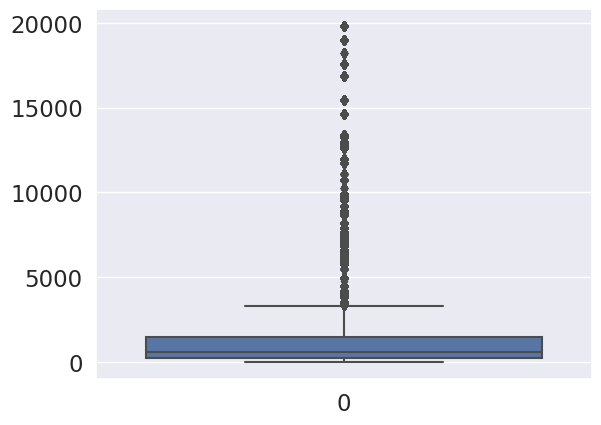

In [ ]:
sns.boxplot(data['Monitored Cap.(MW)'])

In [ ]:
q3 = data['Monitored Cap.(MW)'].quantile(.75)
q1 = data['Monitored Cap.(MW)'].quantile(.25)
iqr = q3-q1
iqr

1250.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Monitored Cap.(MW)']>bottomrange) & (data['Monitored Cap.(MW)']<upperrange)]

<Axes: >

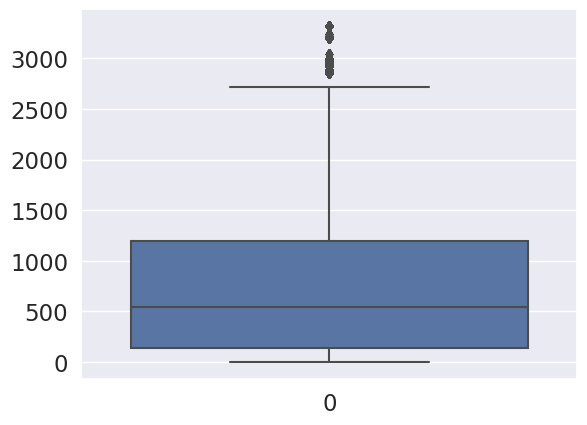

In [ ]:
sns.boxplot(data['Monitored Cap.(MW)'])

<Axes: >

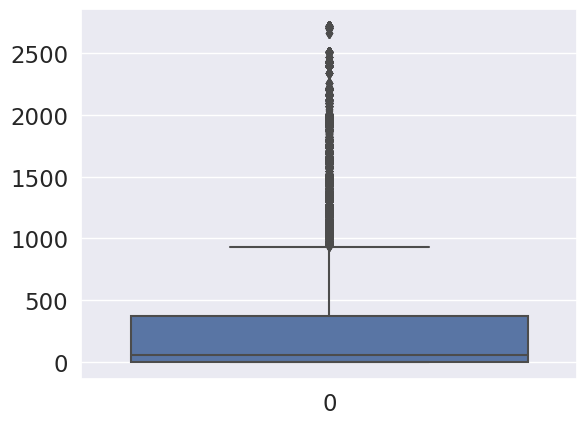

In [ ]:
sns.boxplot(data['Total Cap. Under Maintenace (MW)'])

In [ ]:
q3 = data['Total Cap. Under Maintenace (MW)'].quantile(.75)
q1 = data['Total Cap. Under Maintenace (MW)'].quantile(.25)
iqr = q3-q1
iqr

375.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Total Cap. Under Maintenace (MW)']>bottomrange) & (data['Total Cap. Under Maintenace (MW)']<upperrange)]

<Axes: >

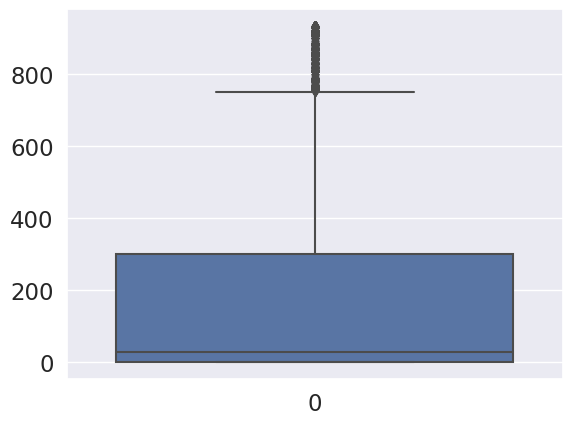

In [ ]:
sns.boxplot(data['Total Cap. Under Maintenace (MW)'])

<Axes: >

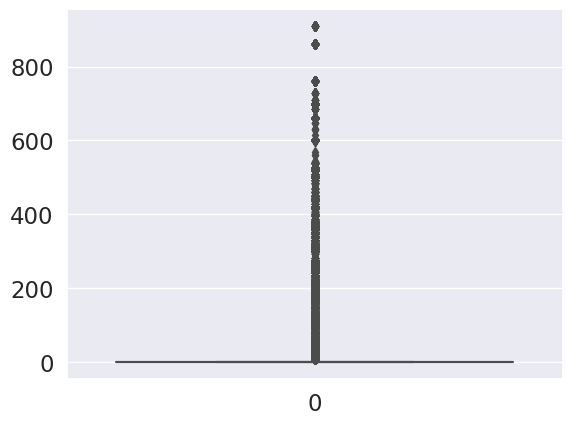

In [ ]:
sns.boxplot(data['Planned Maintanence (MW)'])

<Axes: >

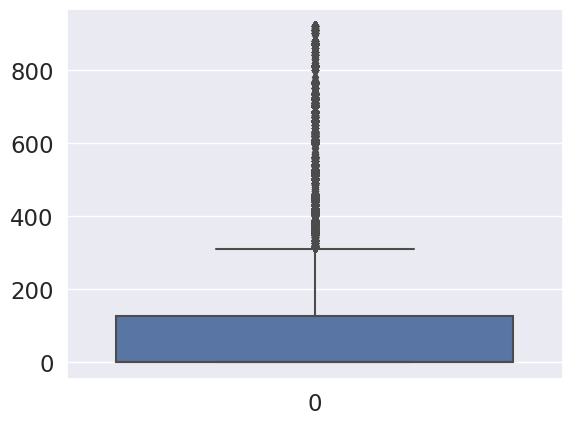

In [ ]:
sns.boxplot(data['Forced Maintanence(MW)'])

In [ ]:
q3 = data['Forced Maintanence(MW)'].quantile(.75)
q1 = data['Forced Maintanence(MW)'].quantile(.25)
iqr = q3-q1
iqr

125.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Forced Maintanence(MW)']>bottomrange) & (data['Forced Maintanence(MW)']<upperrange)]

<Axes: >

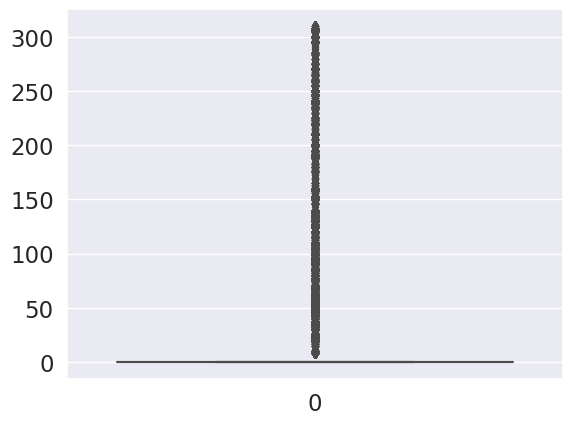

In [ ]:
sns.boxplot(data['Forced Maintanence(MW)'])

<Axes: >

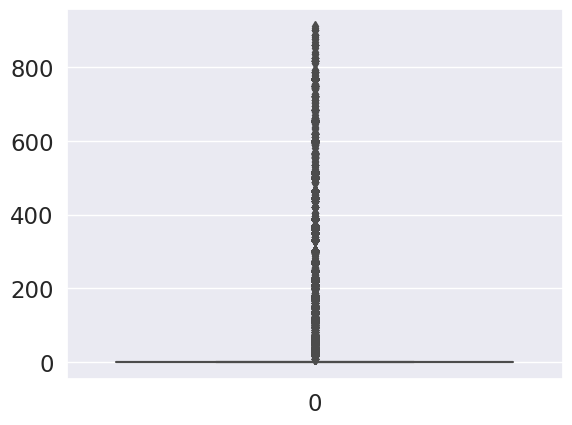

In [ ]:
sns.boxplot(data['Other Reasons (MW)'])

<Axes: >

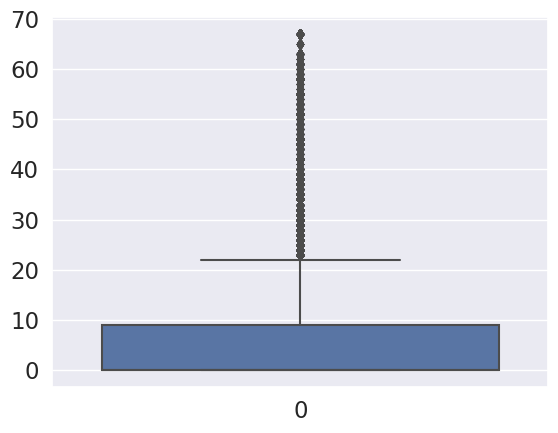

In [ ]:
sns.boxplot(data['Programme or Expected(MU)'])

In [ ]:
q3 = data['Programme or Expected(MU)'].quantile(.75)
q1 = data['Programme or Expected(MU)'].quantile(.25)
iqr = q3-q1
iqr

9.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Programme or Expected(MU)']>bottomrange) & (data['Programme or Expected(MU)']<upperrange)]

<Axes: >

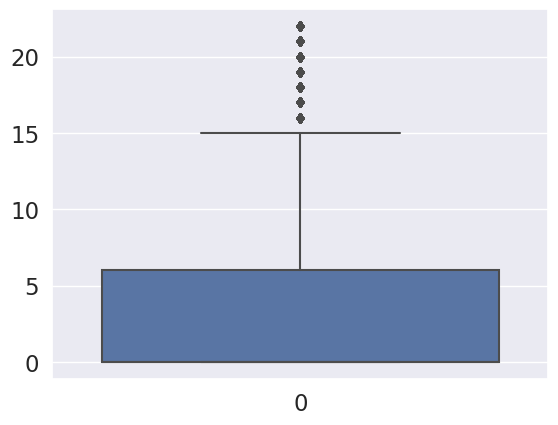

In [ ]:
sns.boxplot(data['Programme or Expected(MU)'])

<Axes: >

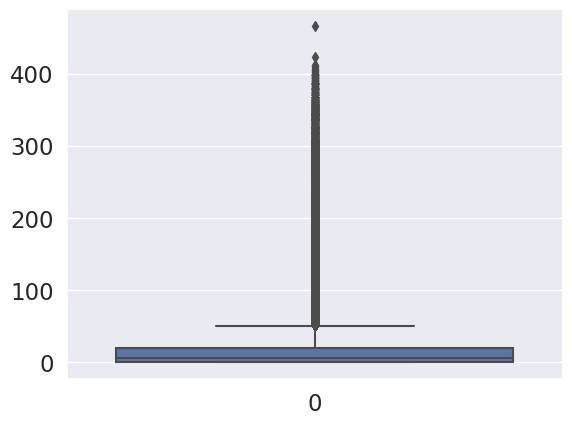

In [ ]:
sns.boxplot(data['Actual(MU)'])

In [ ]:
q3 = data['Actual(MU)'].quantile(.75)
q1 = data['Actual(MU)'].quantile(.25)
iqr = q3-q1
iqr

11.0

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Actual(MU)']>bottomrange) & (data['Actual(MU)']<upperrange)]

<Axes: >

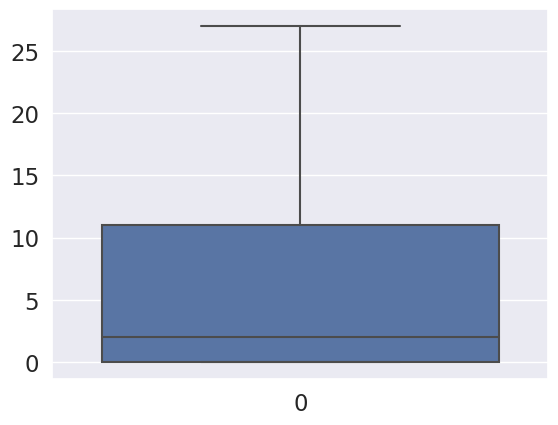

In [ ]:
sns.boxplot(data['Actual(MU)'])

<Axes: >

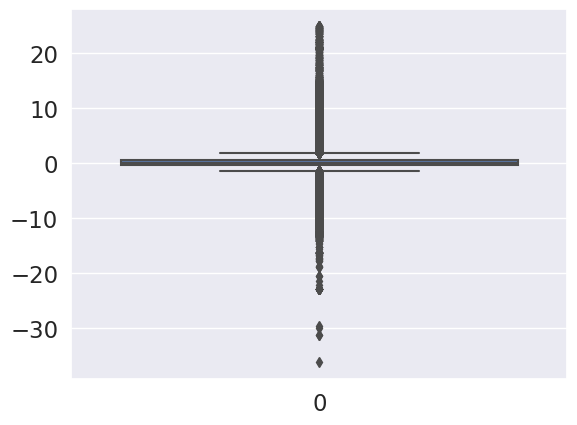

In [ ]:
sns.boxplot(data['Excess(+) / Shortfall (-)'])

In [ ]:
q3 = data['Excess(+) / Shortfall (-)'].quantile(.75)
q1 = data['Excess(+) / Shortfall (-)'].quantile(.25)
iqr = q3-q1
iqr

0.81

In [ ]:
upperrange = q3+1.5*iqr
bottomrange = q1-1.5*iqr
data = data[(data['Excess(+) / Shortfall (-)']>bottomrange) & (data['Excess(+) / Shortfall (-)']<upperrange)]

#EXPLORATORY DATA ANALYSIS (EDA)

##LINEAR OR LOGISTIC

In [ ]:
plt.figure(figsize = (30,50))

plt.scatter(data['Power Station'], data['Actual(MU)'])
plt.show()

# Calculate the correlation coefficient
corr_coef = data['Power Station'].corr(data['Actual(MU)'])
print('Correlation Coefficient:', corr_coef)

In [ ]:
# Visualize the distribution of the outcome variable
plt.hist(data['Power Station'])
plt.show()

# Check if the independent variable is categorical or binary
print('Independent Variable:', data['Actual(MU)'].unique())

In [ ]:
plt.figure(figsize = (30,50))

sns.regplot(x="Power Station", y="Actual(MU)", data=data)

##KDE Plot

In [ ]:
len(data['Power Station'].unique())

166

In [ ]:
data['Power Station'].value_counts()

60     5742
30     4574
108    3828
28     3828
64     3828
       ... 
158     192
143     172
124     166
86       37
75       20
Name: Power Station, Length: 166, dtype: int64

In [ ]:
data['Monitored Cap.(MW)'].value_counts()

600.0     21959
0.0       21024
1200.0    19797
300.0      8174
100.0      6249
          ...  
2700.0        6
1577.0        6
2220.0        6
1944.5        5
720.0         4
Name: Monitored Cap.(MW), Length: 155, dtype: int64

<ipython-input-39-dee402adb252>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Monitored Cap.(MW)'],shade=True);


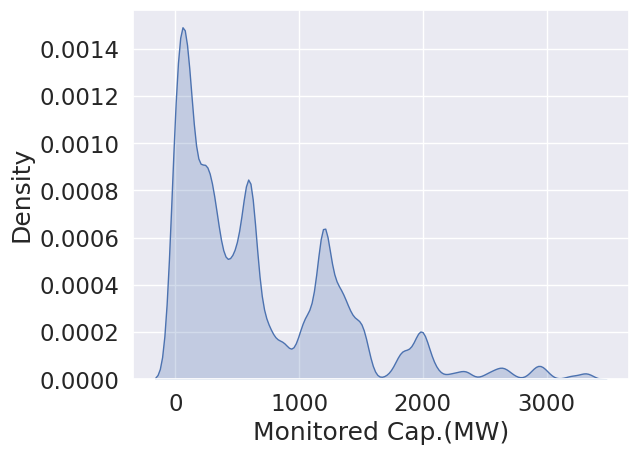

In [ ]:
sns.kdeplot(data['Monitored Cap.(MW)'],shade=True);

In [ ]:
data['Total Cap. Under Maintenace (MW)'].value_counts()

0.00      138513
600.00     13870
300.00     11664
220.00      6972
660.00      5571
           ...  
144.18         1
124.18         1
622.50         1
473.00         1
119.08         1
Name: Total Cap. Under Maintenace (MW), Length: 1447, dtype: int64

<ipython-input-41-e6567424b1c6>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Total Cap. Under Maintenace (MW)'],shade=True);


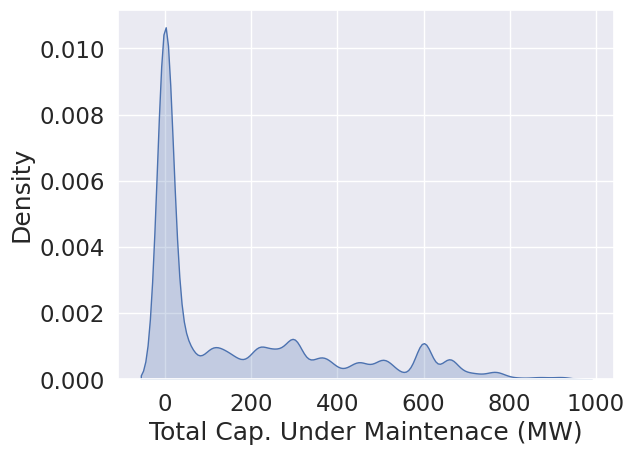

In [ ]:
sns.kdeplot(data['Total Cap. Under Maintenace (MW)'],shade=True);

In [ ]:
data['Planned Maintanence (MW)'].value_counts()

0.00      255489
250.00      1858
600.00      1191
300.00      1105
150.00      1027
           ...  
430.00         1
241.55         1
413.00         1
70.00          1
102.50         1
Name: Planned Maintanence (MW), Length: 348, dtype: int64

<ipython-input-43-ac5d3976fcdb>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Planned Maintanence (MW)'],shade=True);


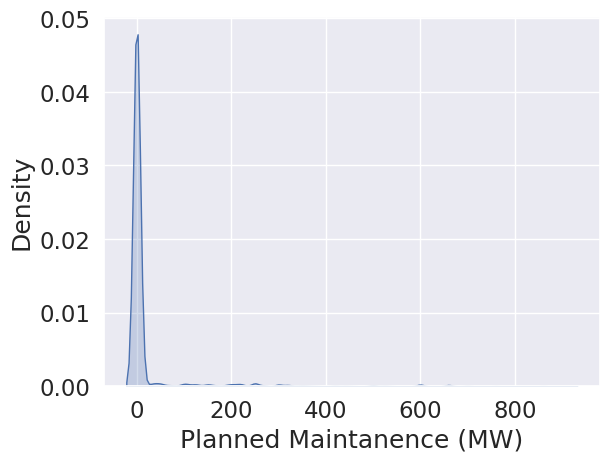

In [ ]:
sns.kdeplot(data['Planned Maintanence (MW)'],shade=True);

In [ ]:
data['Forced Maintanence(MW)'].value_counts()

0.00      192027
600.00     12231
300.00     10468
660.00      4440
270.00      4204
           ...  
406.60         1
410.60         1
114.14         1
234.00         1
780.00         1
Name: Forced Maintanence(MW), Length: 525, dtype: int64

<ipython-input-45-8957112184aa>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Forced Maintanence(MW)'],shade=True);


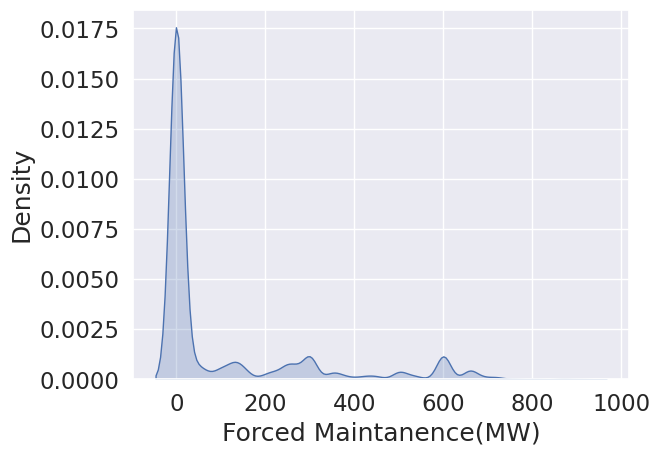

In [ ]:
sns.kdeplot(data['Forced Maintanence(MW)'],shade=True);

In [ ]:
data['Other Reasons (MW)'].value_counts()

0      269066
220       940
48        424
135       390
225       361
        ...  
841         1
332         1
883         1
176         1
219         1
Name: Other Reasons (MW), Length: 252, dtype: int64

<ipython-input-47-c0719da6ba89>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Other Reasons (MW)'],shade=True);


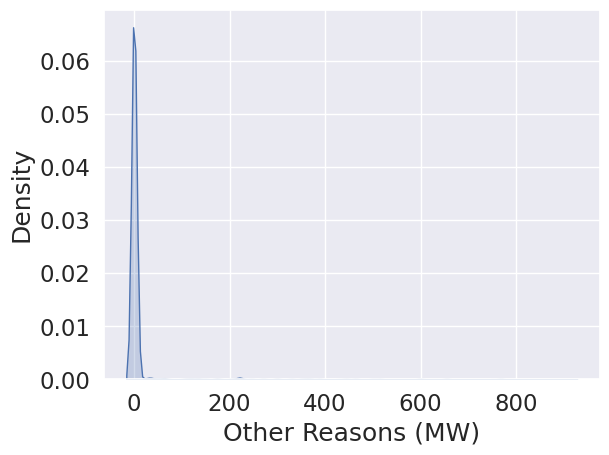

In [ ]:
sns.kdeplot(data['Other Reasons (MW)'],shade=True);

In [ ]:
data['Programme or Expected(MU)'].value_counts()

0     133774
1      16418
10      9305
2       8936
4       8266
       ...  
56        71
43        59
62        40
41        31
65        19
Name: Programme or Expected(MU), Length: 66, dtype: int64

<ipython-input-49-25356b39cdb4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Programme or Expected(MU)'],shade=True);


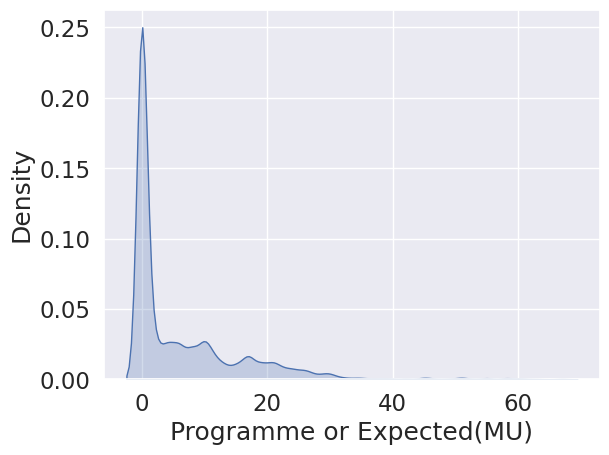

In [ ]:
sns.kdeplot(data['Programme or Expected(MU)'],shade=True);

In [ ]:
data['Actual(MU)'].value_counts()

0      116101
1       12291
2       10931
4        9150
6        7867
        ...  
76         23
67         16
91          2
122         1
153         1
Name: Actual(MU), Length: 80, dtype: int64

<ipython-input-51-bb0b25b17590>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Actual(MU)'],shade=True);


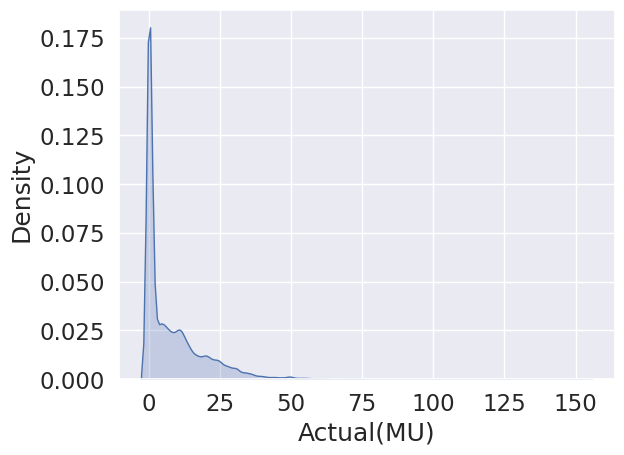

In [ ]:
sns.kdeplot(data['Actual(MU)'],shade=True);

In [ ]:
data['Excess(+) / Shortfall (-)'].value_counts()

 0.00     74288
-0.06      1448
-0.26      1176
-0.13      1016
-0.04      1014
          ...  
 23.24        1
 28.60        1
 29.29        1
 23.71        1
 23.61        1
Name: Excess(+) / Shortfall (-), Length: 4483, dtype: int64

<ipython-input-53-9a5bbbc3ec07>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Excess(+) / Shortfall (-)'],shade=True);


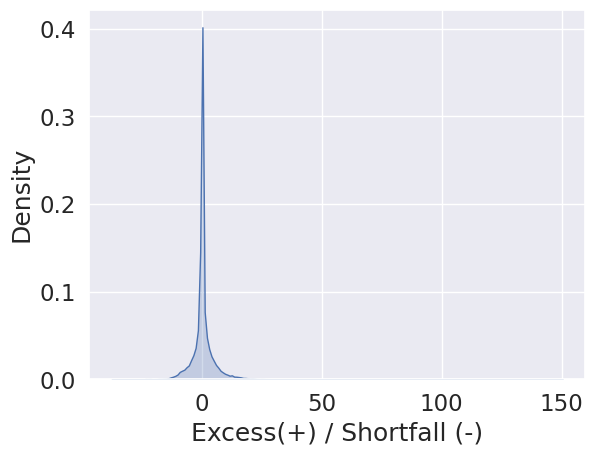

In [ ]:
sns.kdeplot(data['Excess(+) / Shortfall (-)'],shade=True);

In [ ]:
data['Deviation'].value_counts()

 0.00      275472
-100.00       767
-10.00         30
 7.69          25
 11.11         24
            ...  
-35.74          1
-21.36          1
-7.39           1
 79.23          1
 7.12           1
Name: Deviation, Length: 3479, dtype: int64

<ipython-input-55-d1eb7a7bc567>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Deviation'],shade=True);


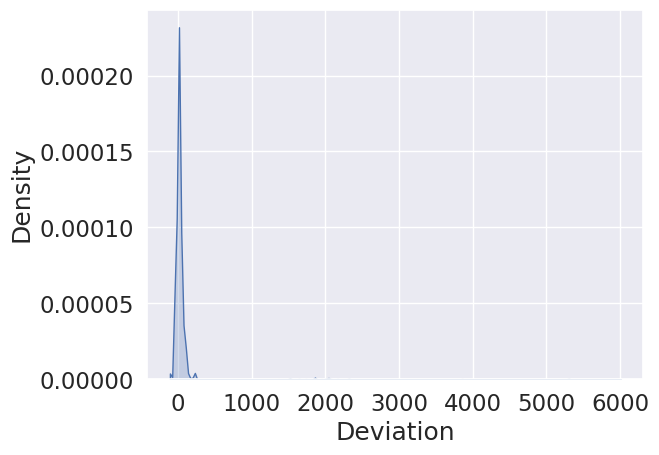

In [ ]:
sns.kdeplot(data['Deviation'],shade=True);

##BAR PLOT

In [ ]:
data['Power Station'].value_counts()

60     5742
30     4574
108    3828
28     3828
64     3828
       ... 
158     192
143     172
124     166
86       37
75       20
Name: Power Station, Length: 166, dtype: int64

In [ ]:
plt.figure(figsize = (30,50))
sns.countplot(y='Power Station',data=data,order=data['Power Station'].value_counts().sort_values().index)

<Axes: xlabel='count', ylabel='Power Station'>

In [ ]:
a = data.groupby('Power Station')['Monitored Cap.(MW)'].mean()
a

Power Station
0      2152.822441
1      2618.800414
2      1779.155636
3      1285.000000
4      2943.548811
          ...     
177    1080.000000
178       0.000000
179     311.718750
180     600.000000
181    1201.912792
Name: Monitored Cap.(MW), Length: 182, dtype: float64

In [ ]:
plt.figure(figsize = (150,550))

sns.barplot(x=a.values,y=a.index)

<Axes: ylabel='Power Station'>

In [ ]:
b = data.groupby('Power Station')['Total Cap. Under Maintenace (MW)'].mean()
b

Power Station
0      751.186317
1      521.159664
2      149.650890
3      330.646329
4      538.643491
          ...    
177    212.374101
178      0.000000
179    125.205592
180     99.043062
181    177.151039
Name: Total Cap. Under Maintenace (MW), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

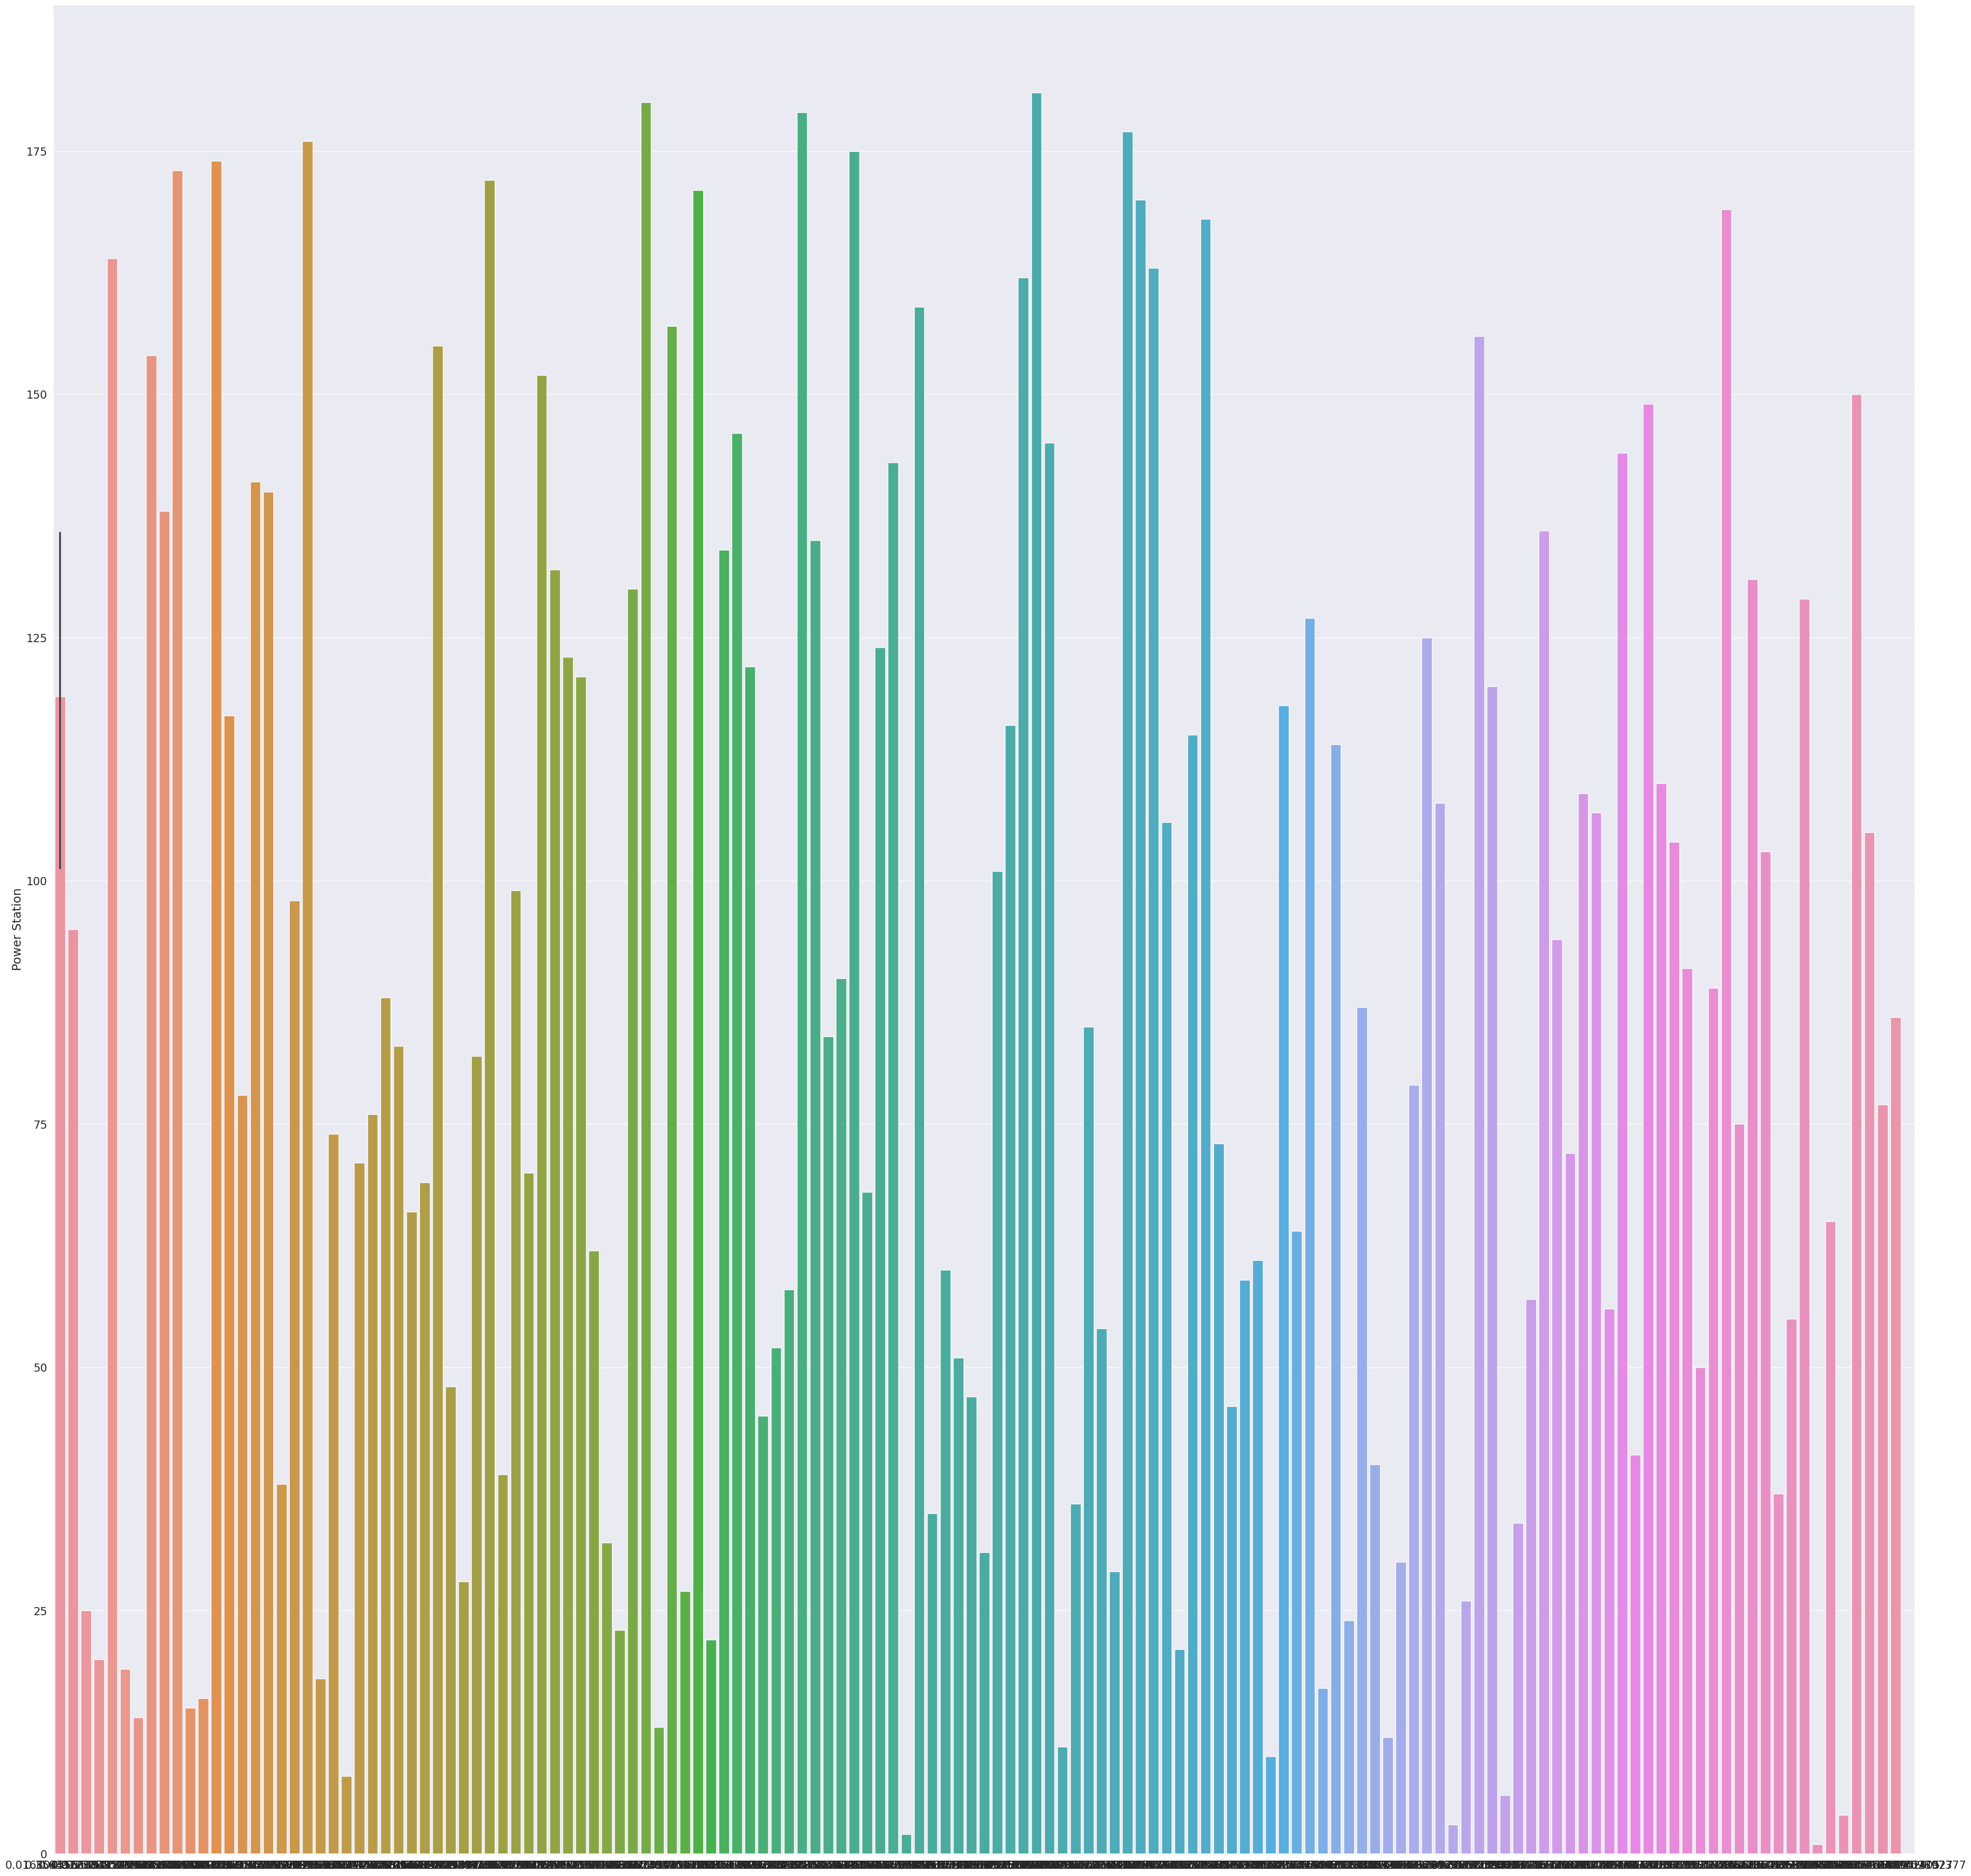

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=b.values,y=b.index)

In [ ]:
c = data.groupby('Power Station')['Planned Maintanence (MW)'].mean()
c

Power Station
0       3.229761
1      81.680672
2      33.214806
3      18.304033
4      65.118343
         ...    
177    13.273381
178     0.000000
179     0.000000
180     0.000000
181    13.248687
Name: Planned Maintanence (MW), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

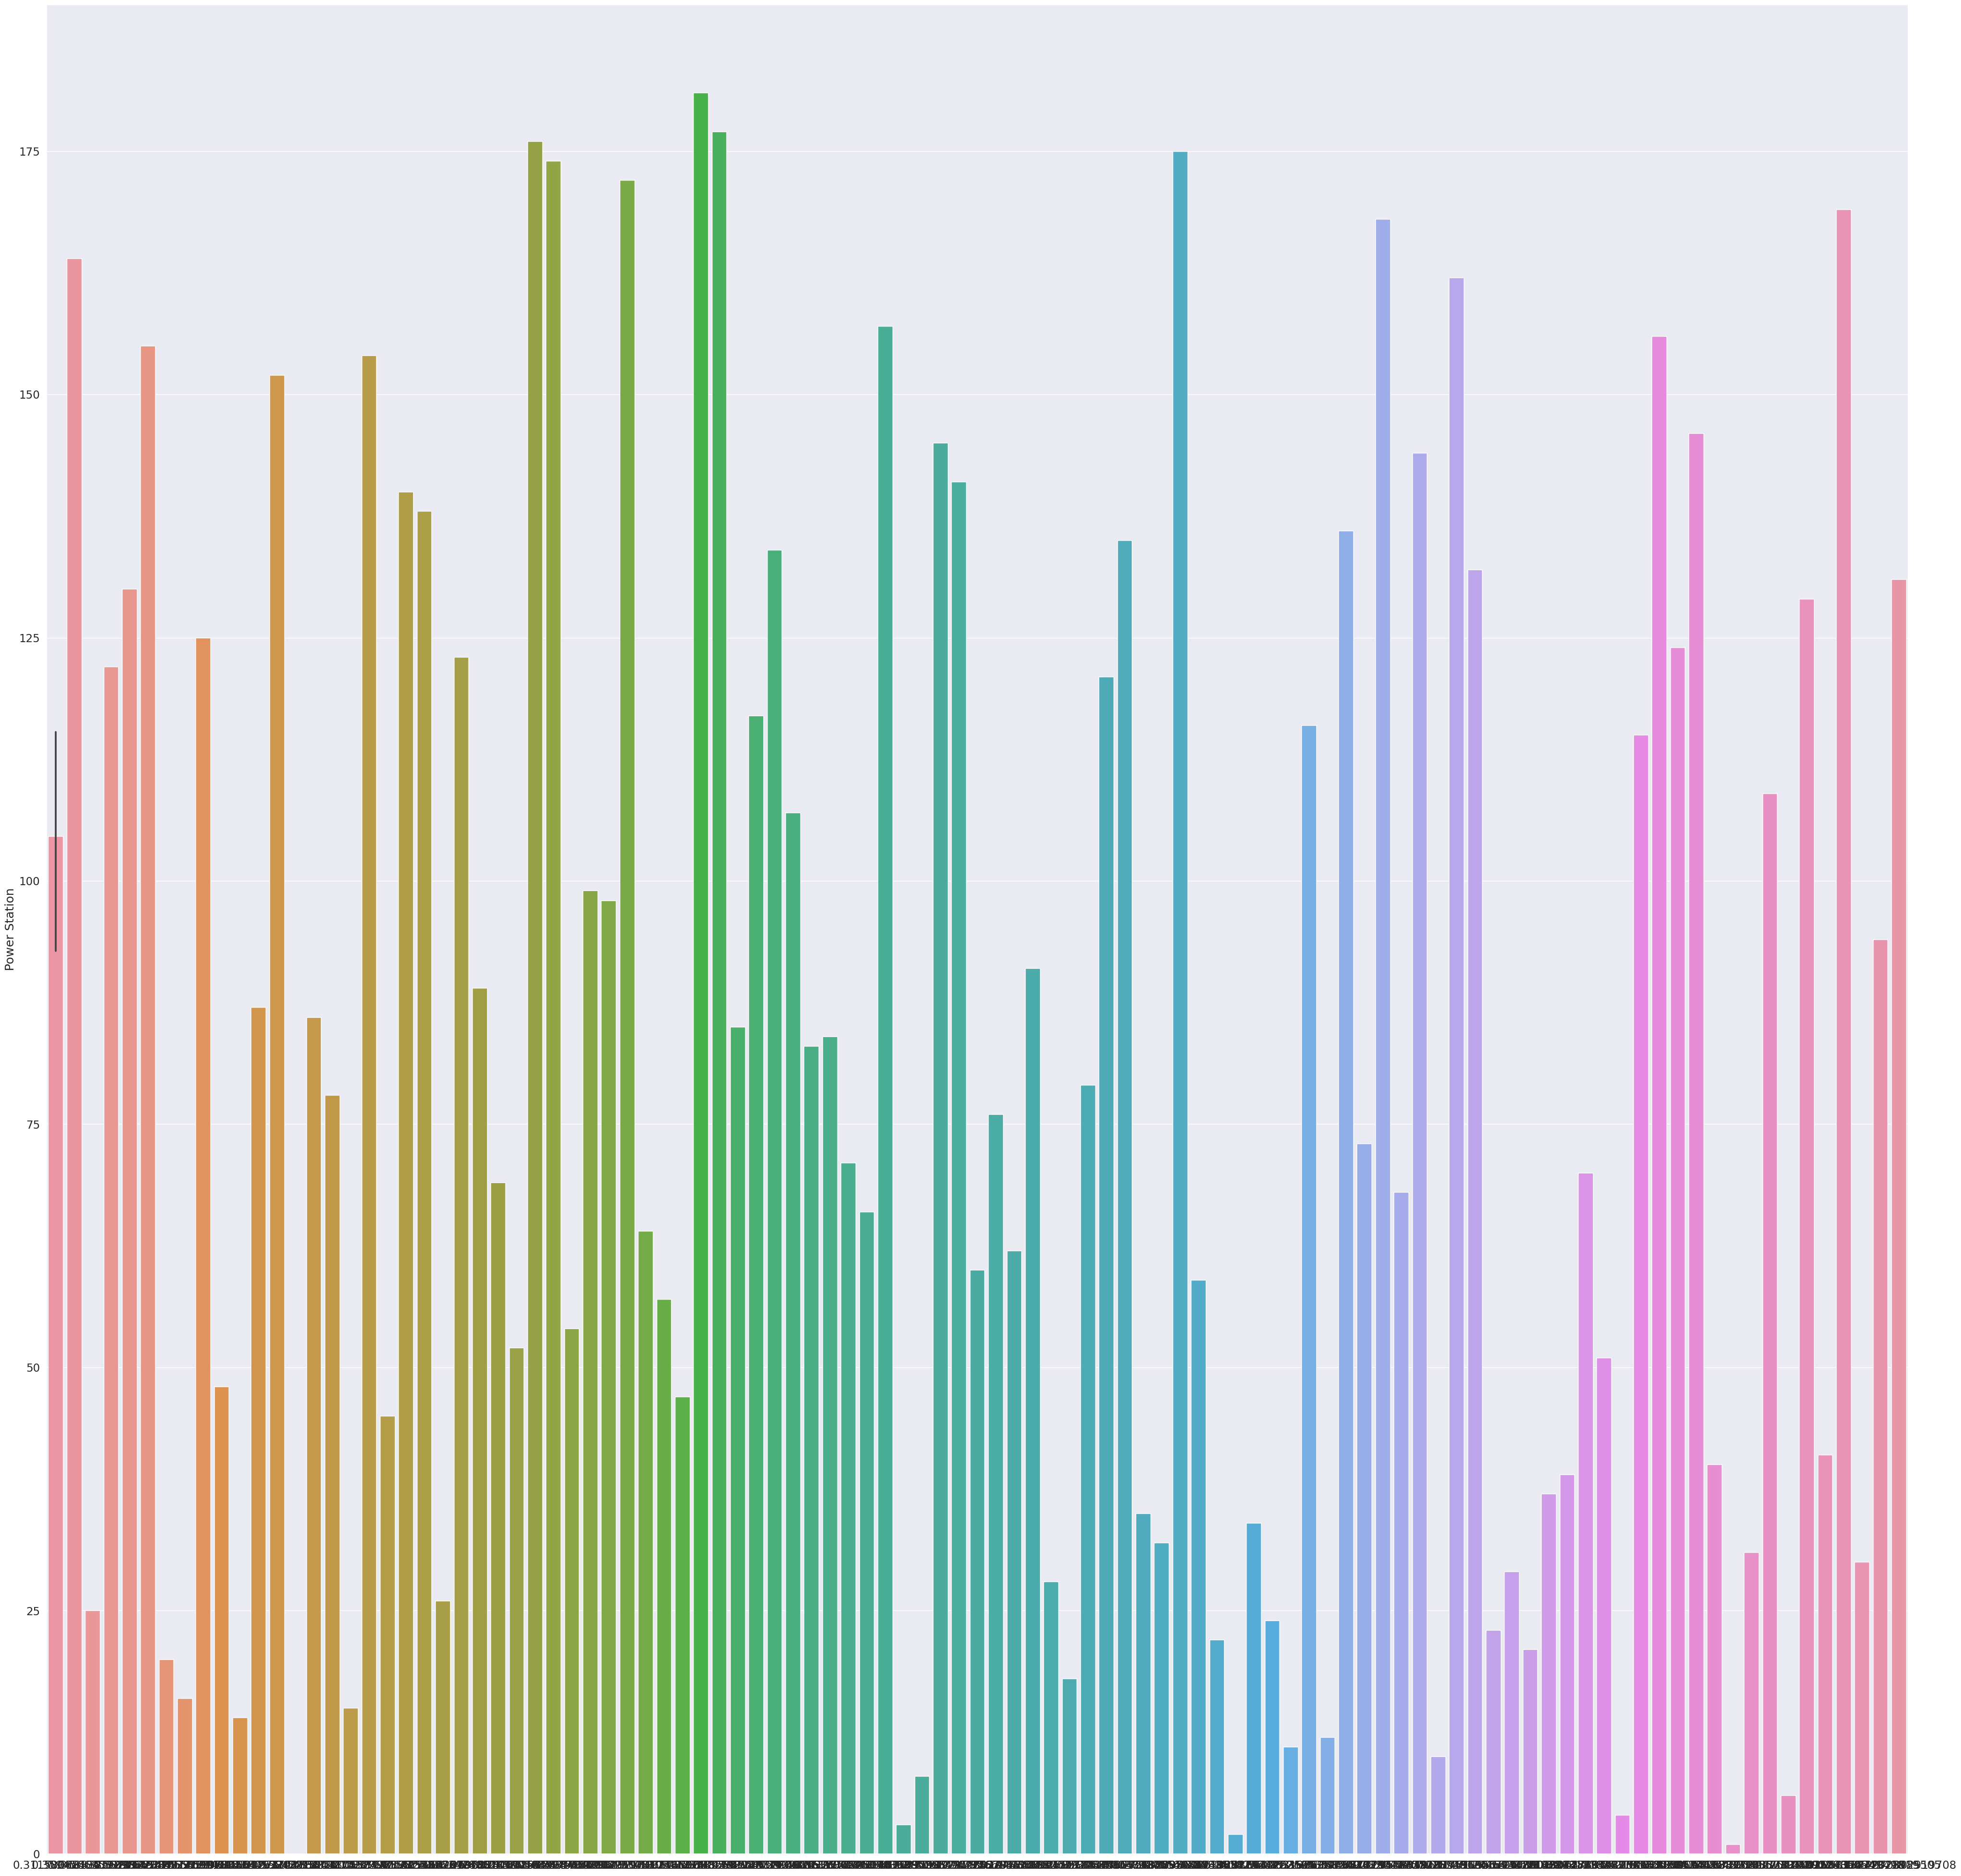

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=c.values,y=c.index)

In [ ]:
d = data.groupby('Power Station')['Forced Maintanence(MW)'].mean()
d

Power Station
0      206.825428
1      437.966387
2        5.078479
3        5.736815
4      452.778107
          ...    
177    199.100719
178      0.000000
179    124.342105
180     99.043062
181    114.757941
Name: Forced Maintanence(MW), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

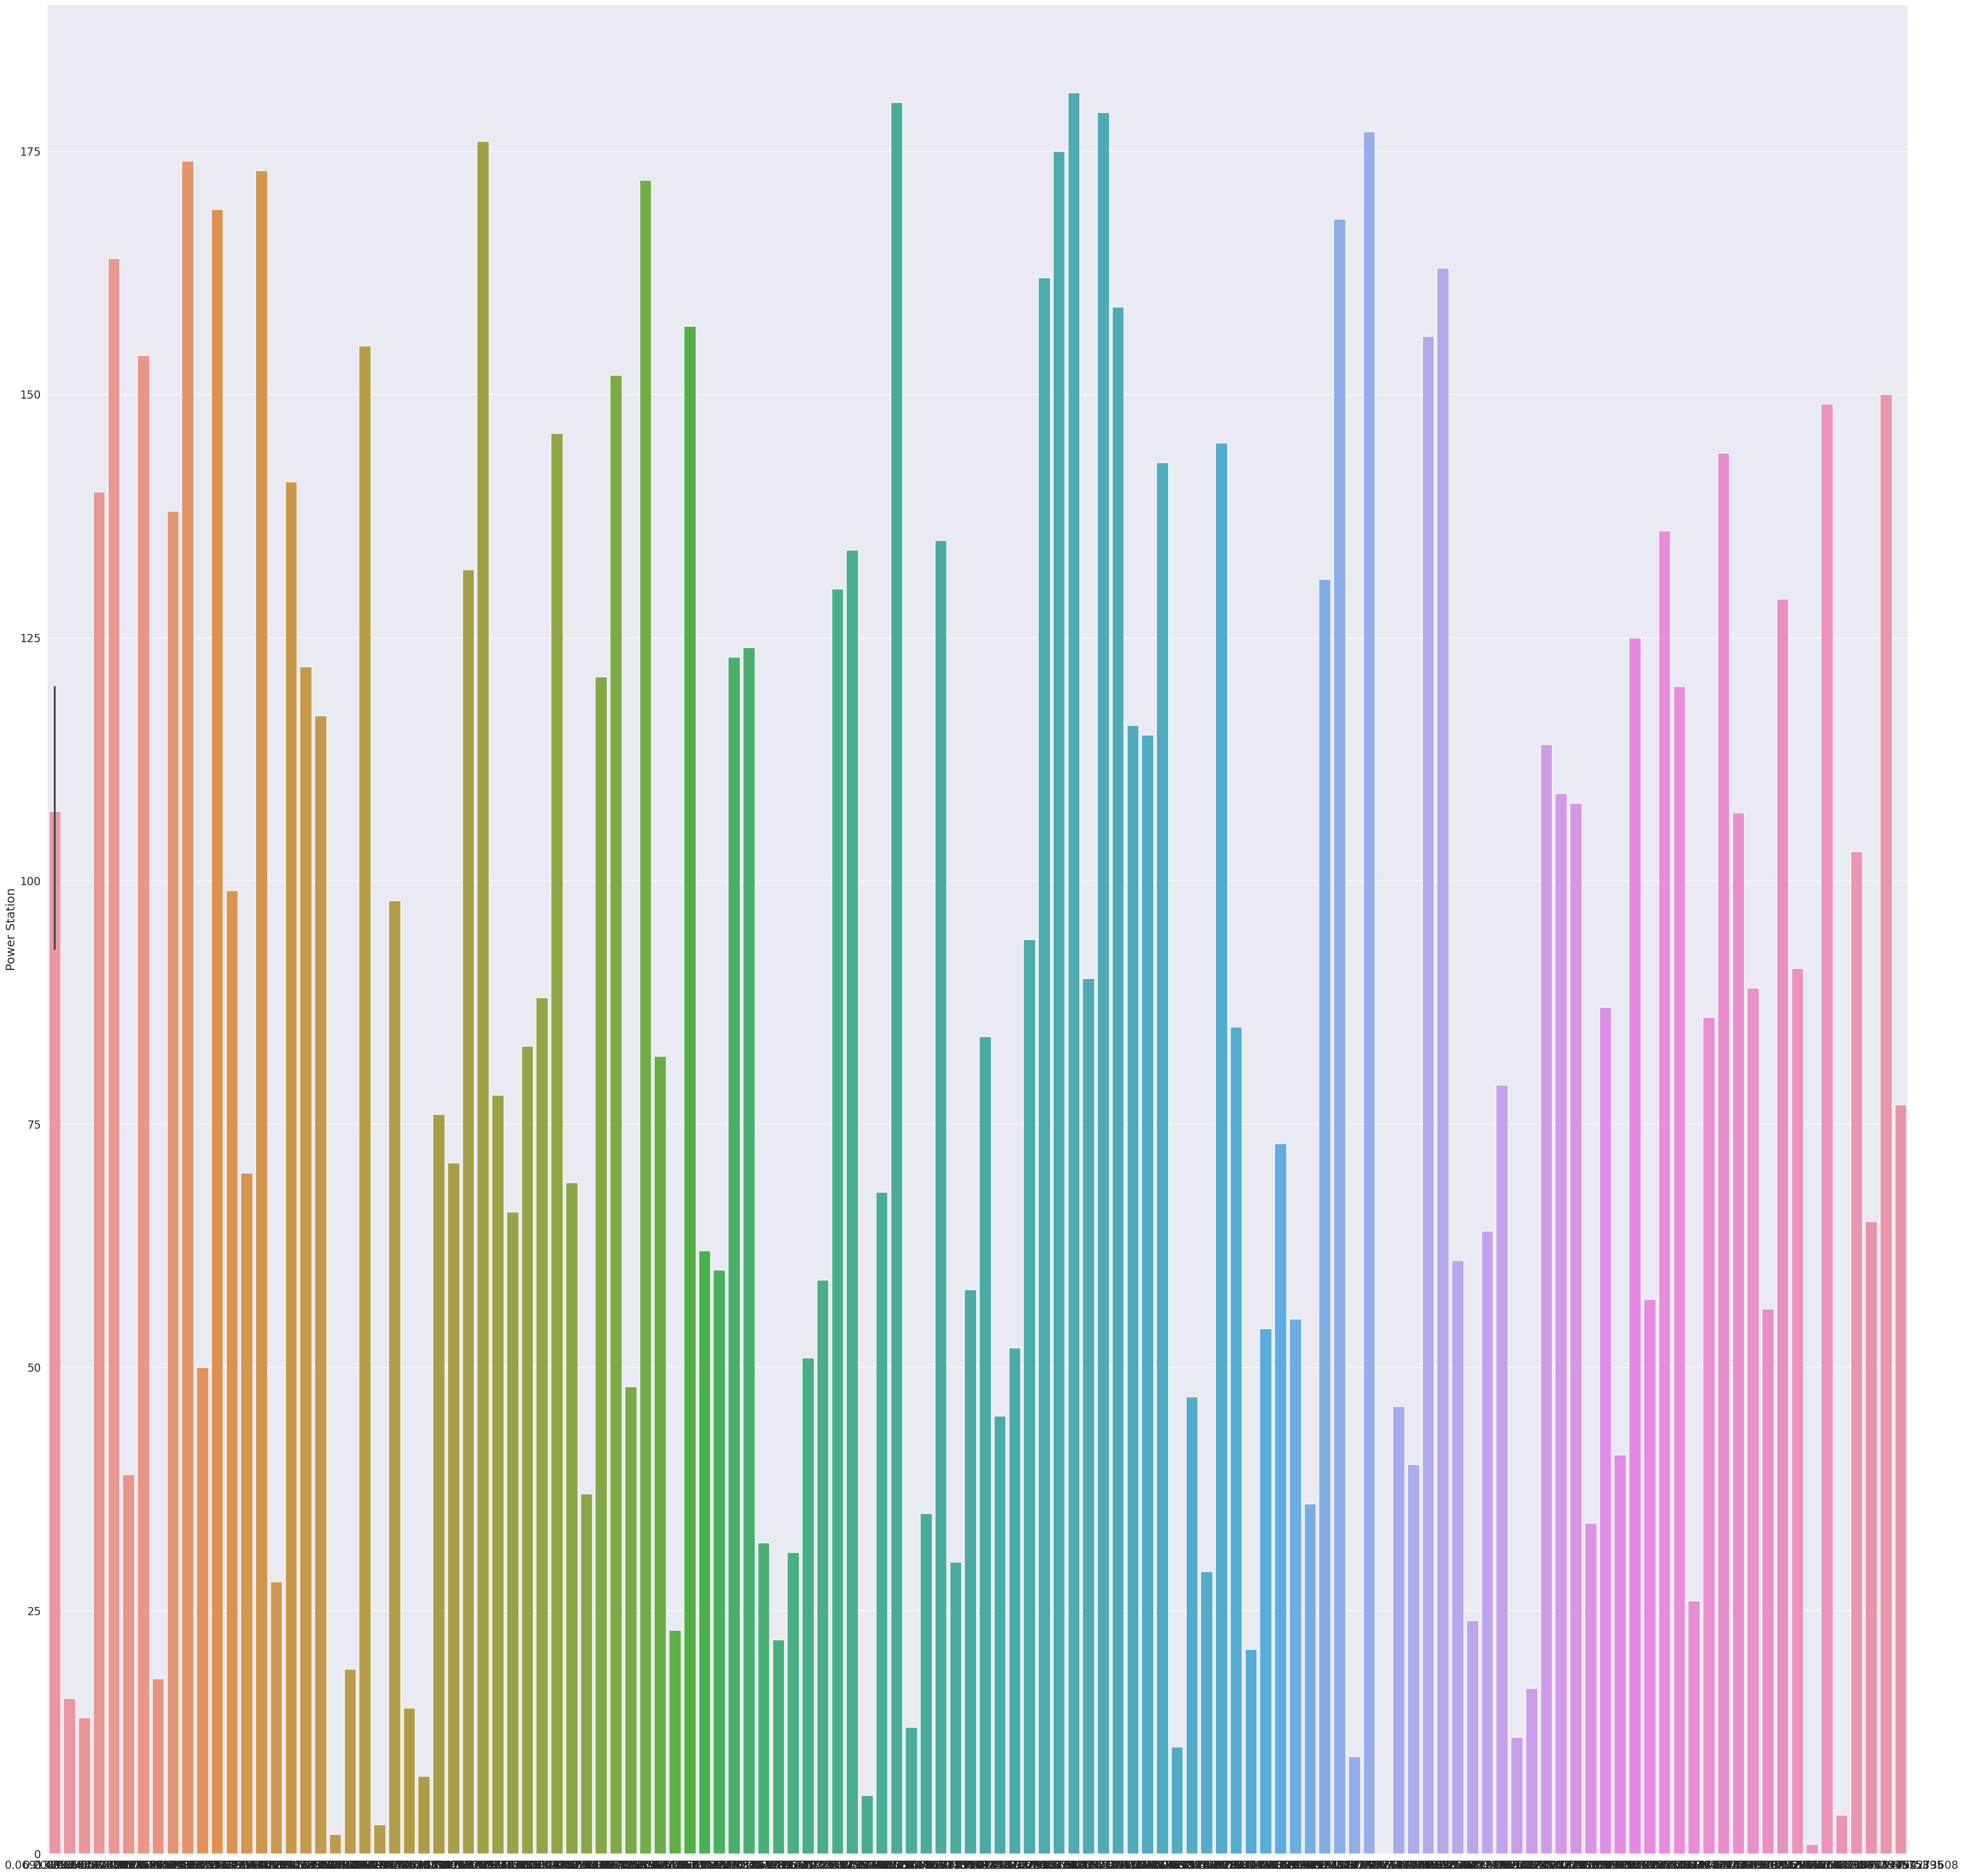

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=d.values,y=d.index)

In [ ]:
e = data.groupby('Power Station')['Other Reasons (MW)'].mean()
e

Power Station
0      32.566135
1       0.000000
2      22.366505
3      58.665977
4       7.961538
         ...    
177     0.000000
178     0.000000
179     0.863487
180     0.000000
181     0.000000
Name: Other Reasons (MW), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

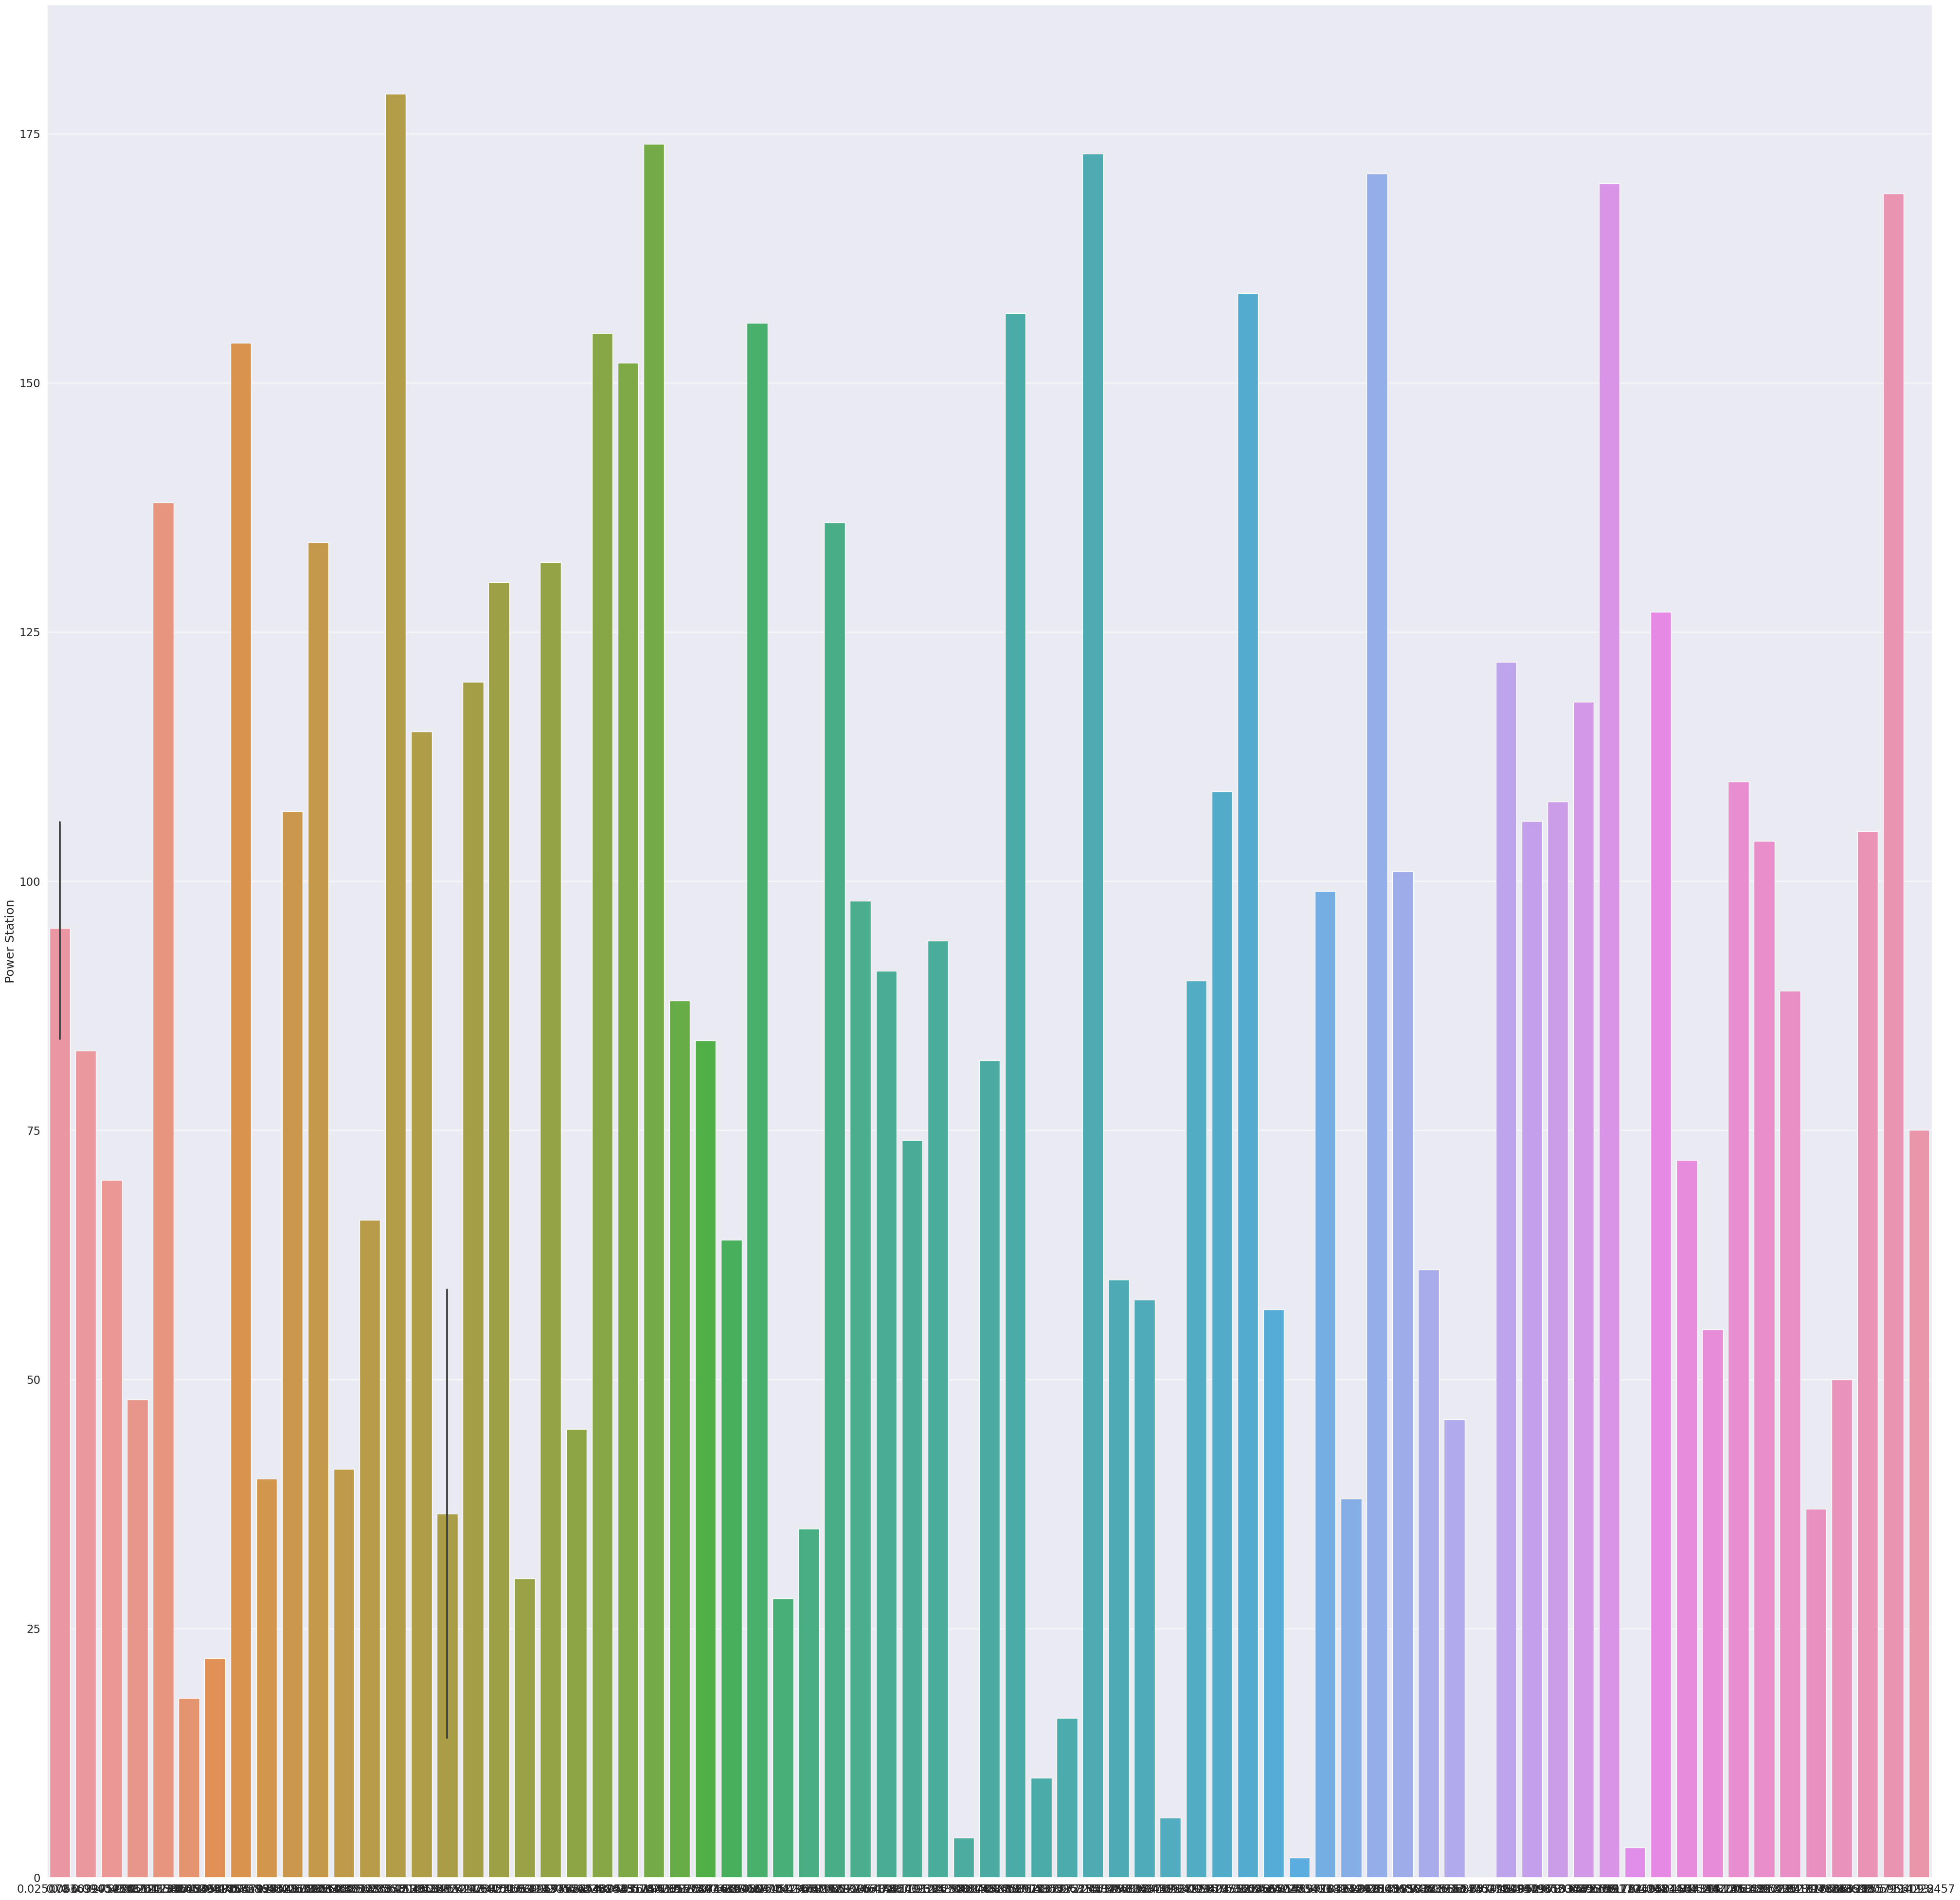

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=e.values,y=e.index)

In [ ]:
f = data.groupby('Power Station')['Programme or Expected(MU)'].mean()
f

Power Station
0      13.800456
1      15.149580
2       5.503236
3       9.928128
4      15.375740
         ...    
177     5.834532
178     1.050987
179     2.085526
180     0.607656
181     7.881095
Name: Programme or Expected(MU), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

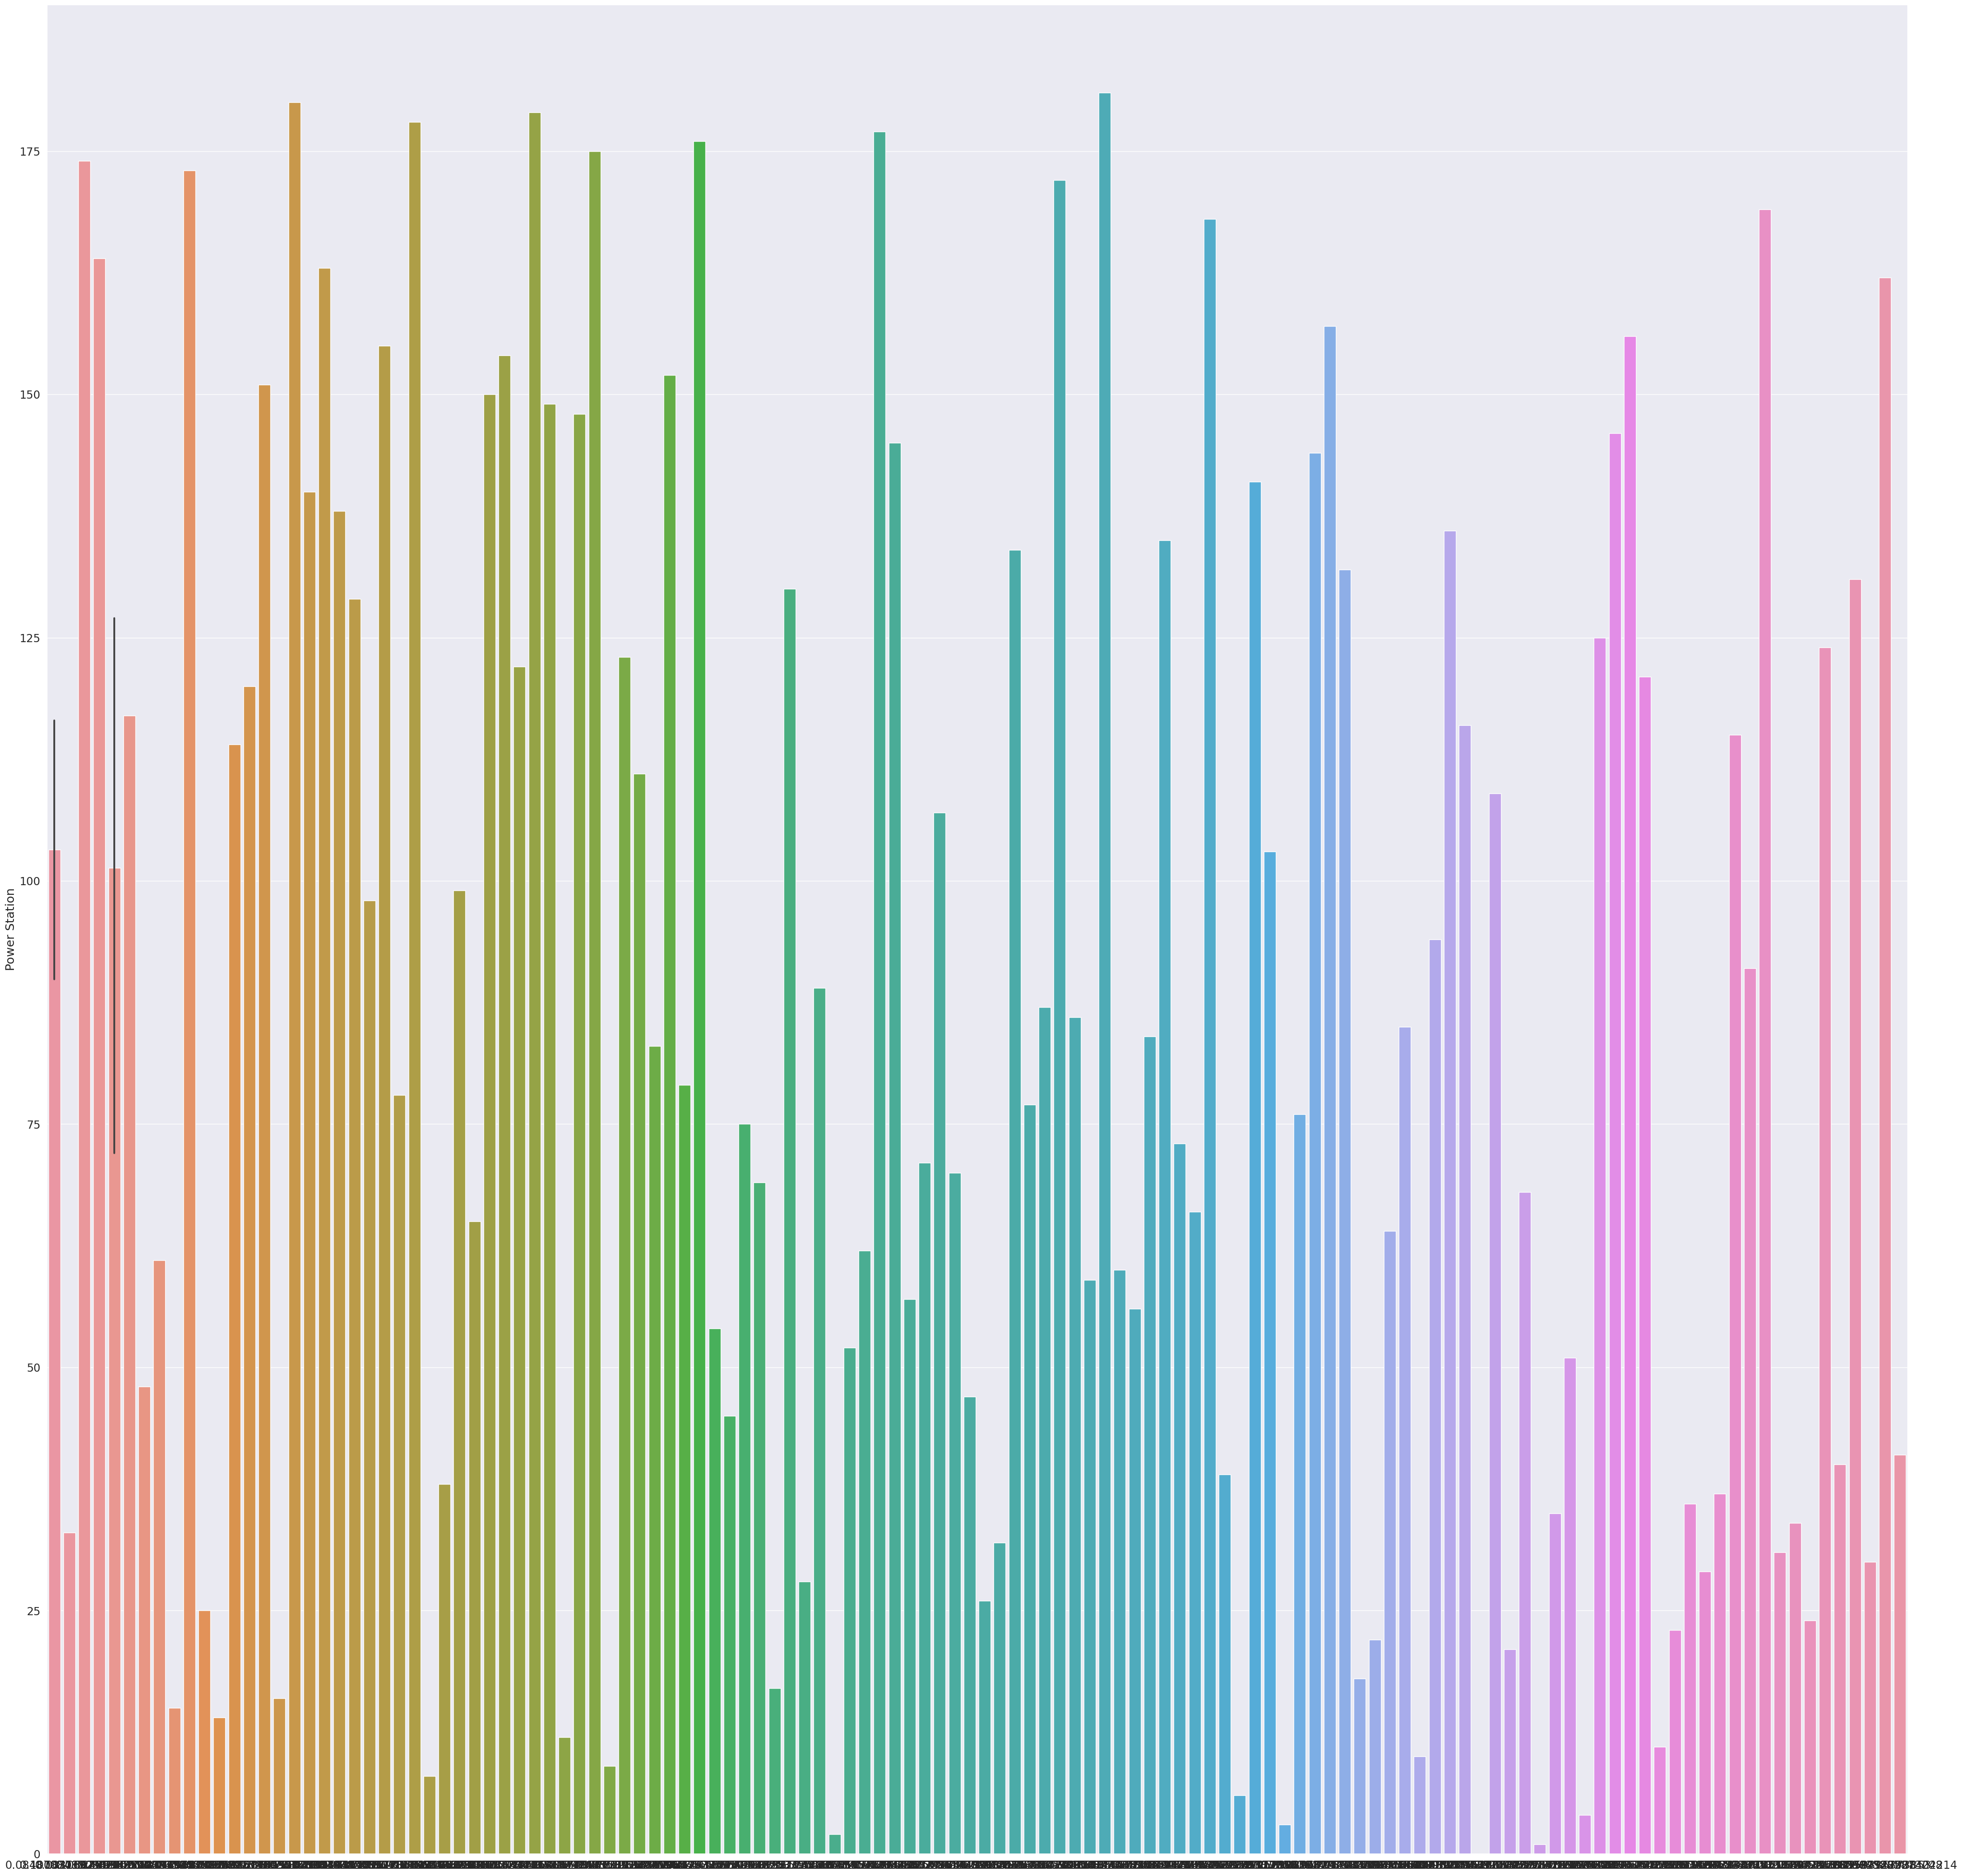

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=f.values,y=f.index)

In [ ]:
g = data.groupby('Power Station')['Actual(MU)'].mean()
g

Power Station
0      15.193548
1       0.000000
2       6.710591
3       7.156295
6      11.621247
         ...    
177    19.333333
178     0.000000
179     6.375000
180     4.528571
181     2.530654
Name: Actual(MU), Length: 164, dtype: float64

In [ ]:
plt.figure(figsize = (70,250))

sns.barplot(x=g.index,y=g.values)

<Axes: xlabel='Power Station'>

In [ ]:
h = data.groupby('Power Station')['Excess(+) / Shortfall (-)'].mean()
h

Power Station
0      -0.312799
1      11.117042
2      -0.181294
3       1.057017
4      11.997041
         ...    
177    -0.111295
178    -3.315296
179    -3.222270
180     2.941938
181    -0.229662
Name: Excess(+) / Shortfall (-), Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

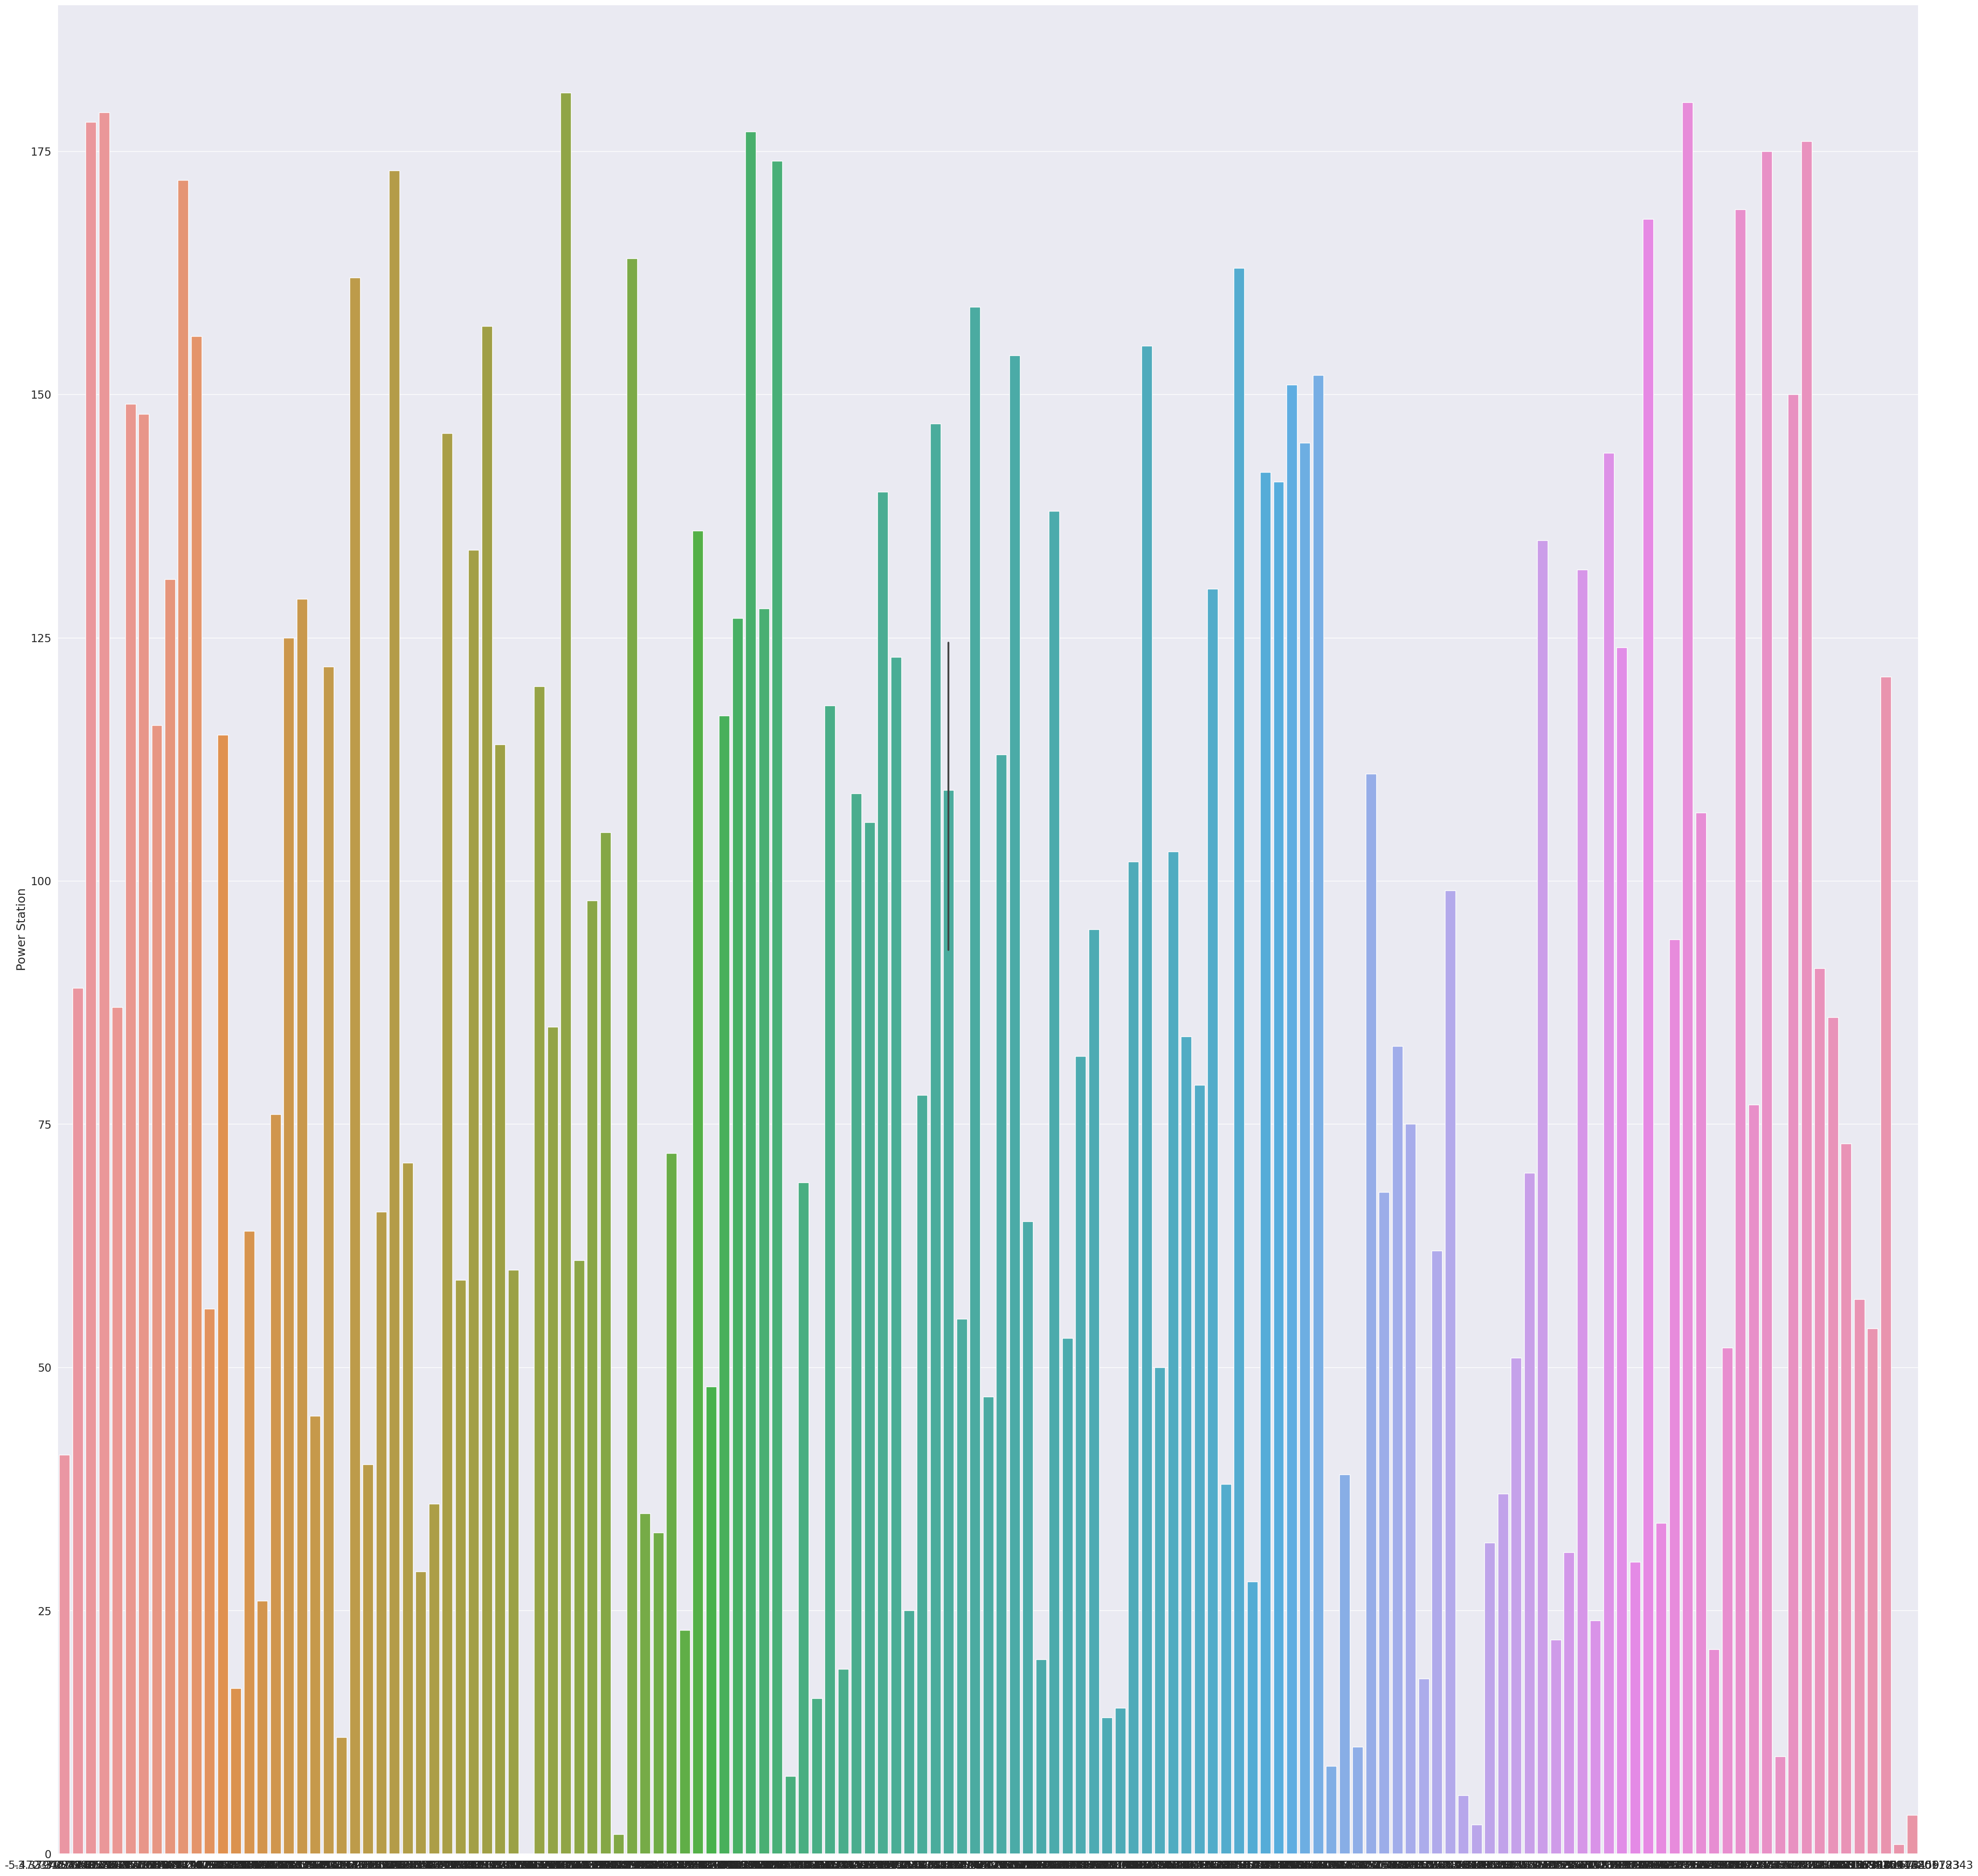

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=h.values,y=h.index)

In [ ]:
i = data.groupby('Power Station')['Deviation'].mean()
i

Power Station
0      0.196505
1      2.079697
2      1.104749
3      1.639137
4      4.466982
         ...   
177   -1.050384
178   -8.059211
179   -7.875296
180    8.715742
181    0.000000
Name: Deviation, Length: 166, dtype: float64

<Axes: ylabel='Power Station'>

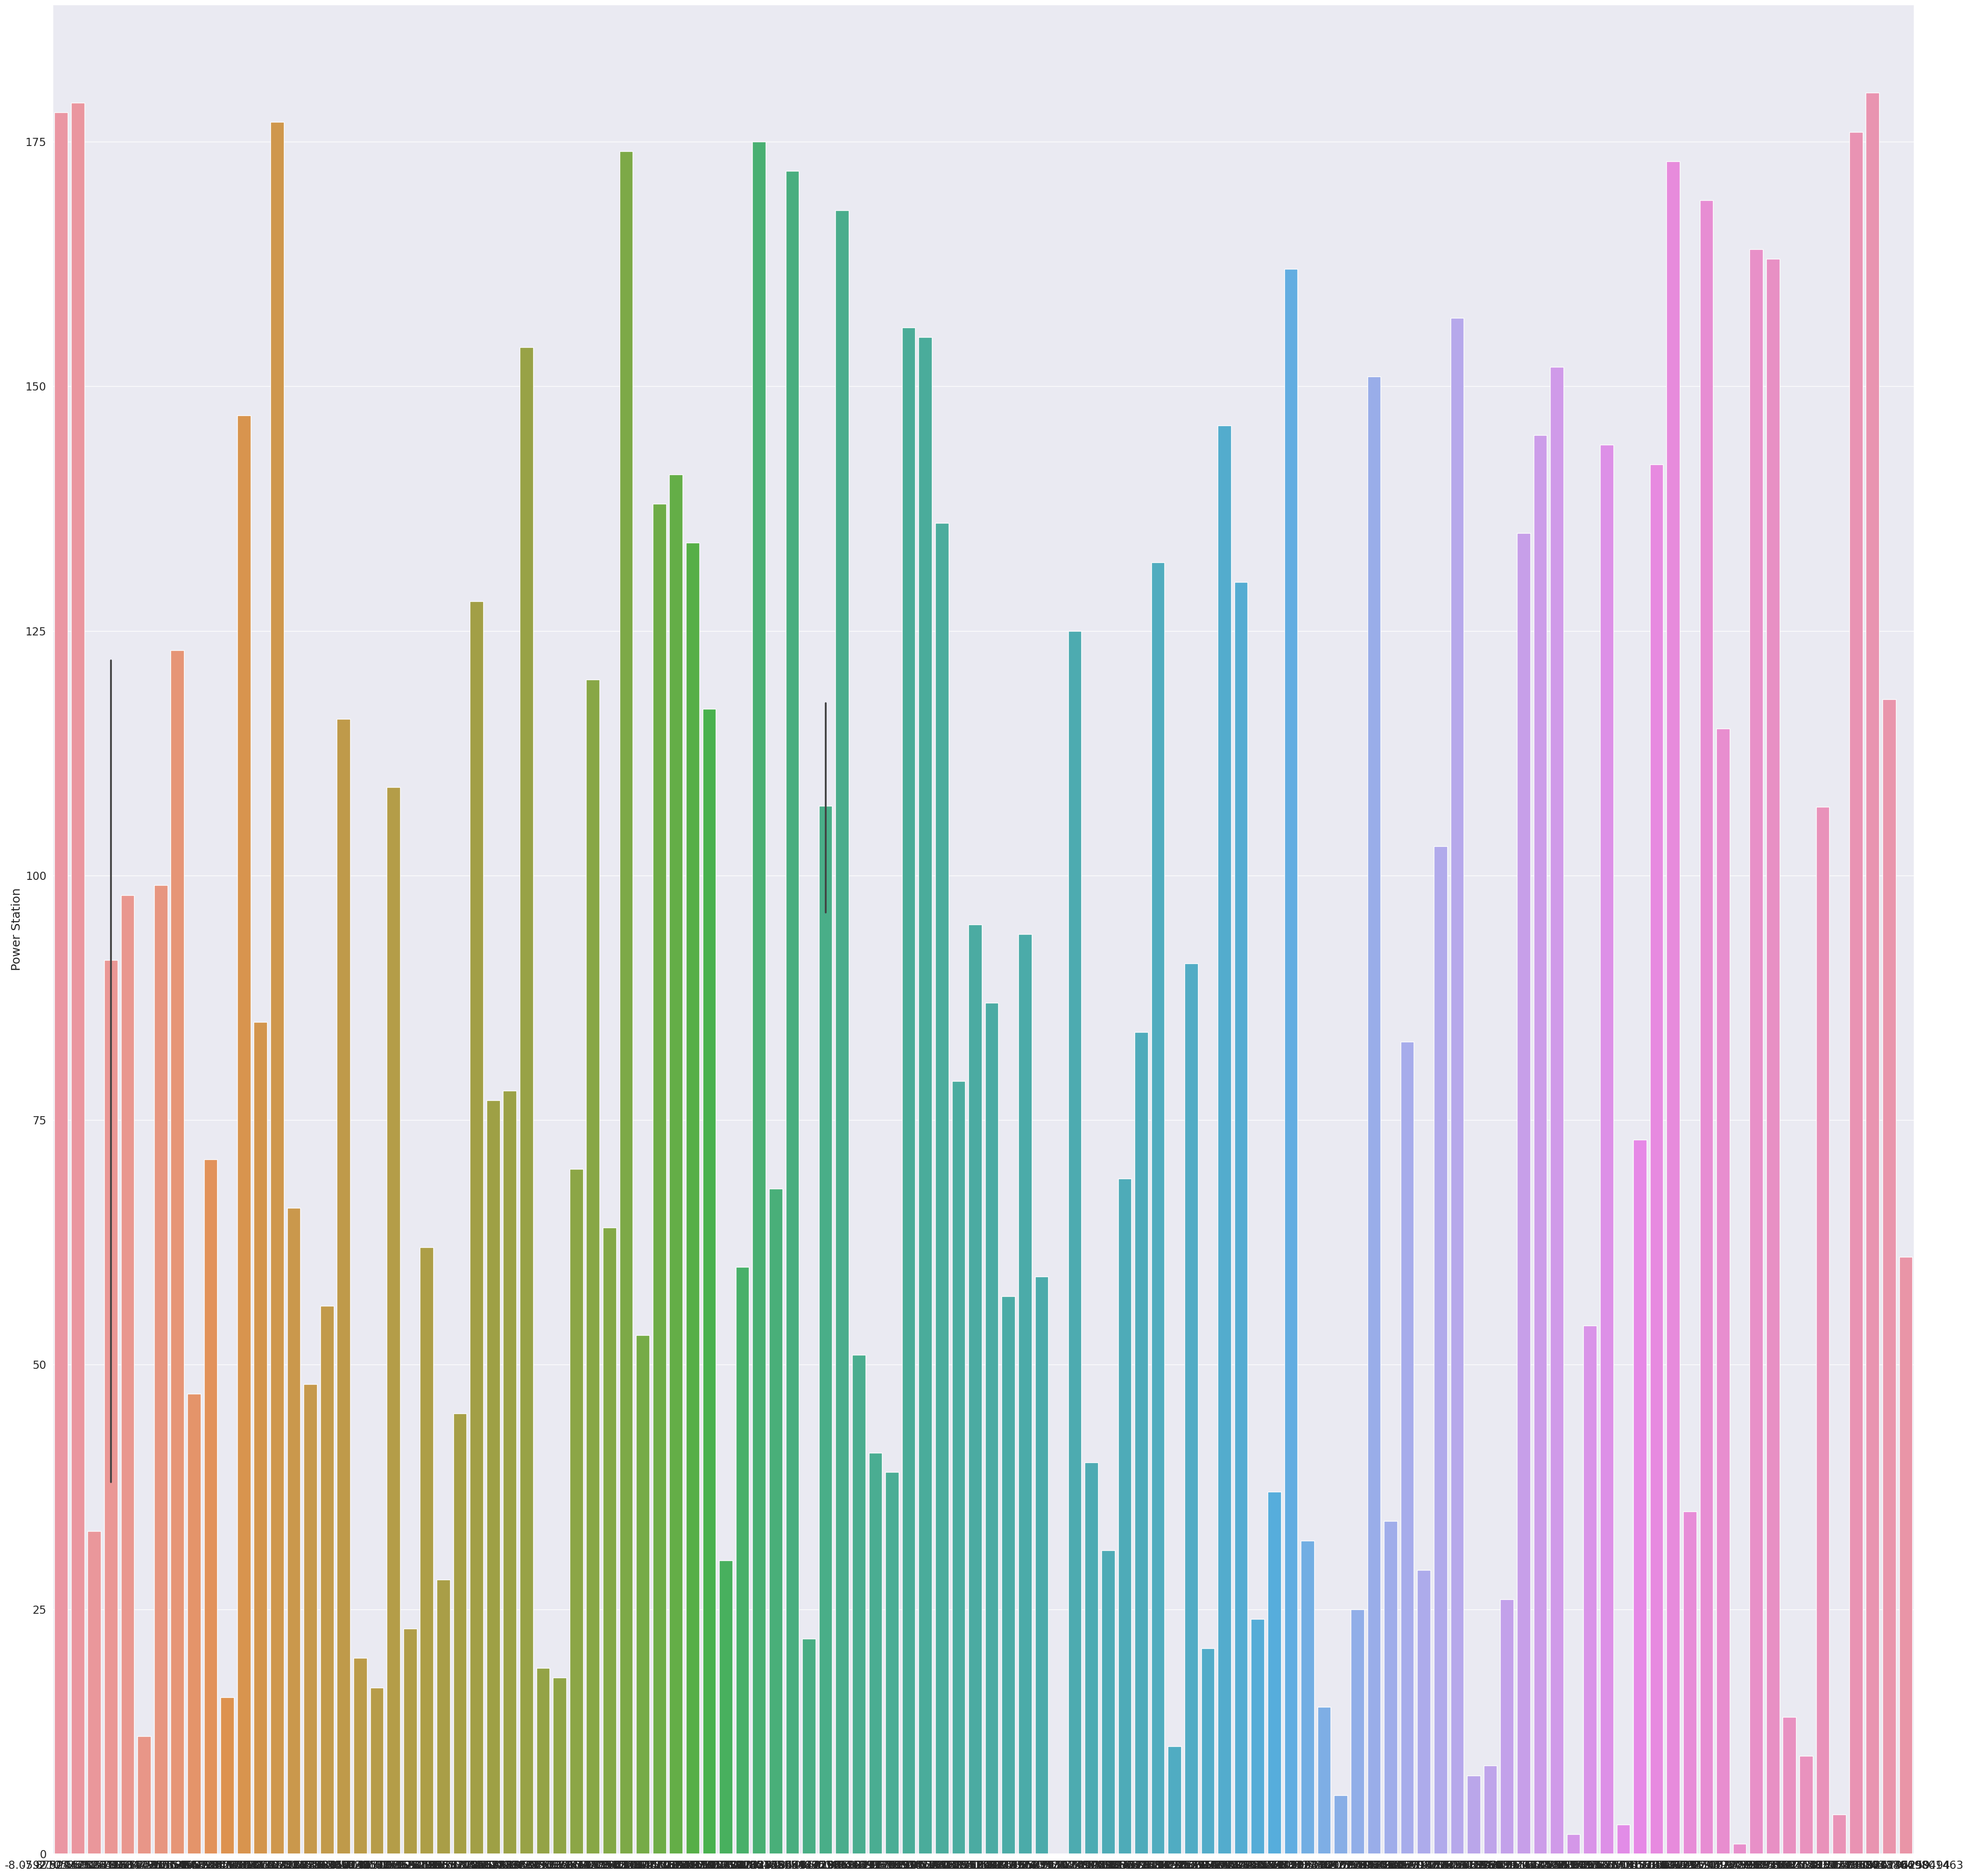

In [ ]:
plt.figure(figsize = (50,50))

sns.barplot(x=i.values,y=i.index)

##Line Plot

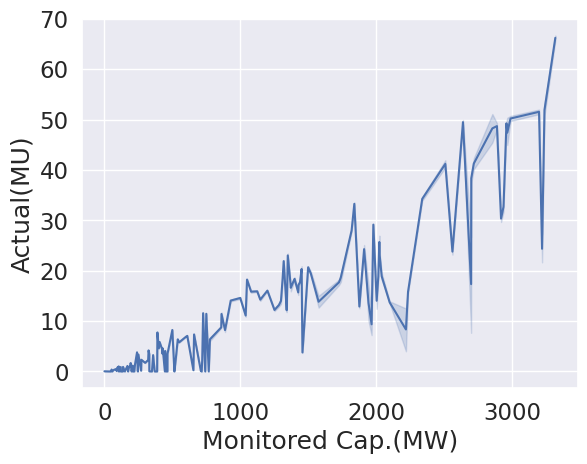

In [ ]:
sns.lineplot(x='Monitored Cap.(MW)',y= 'Actual(MU)', data=data);

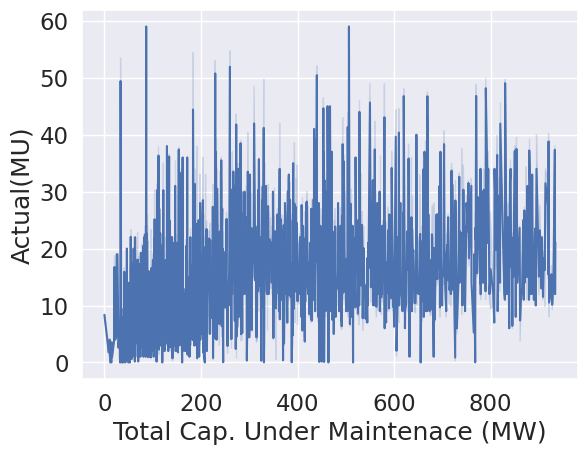

In [ ]:
sns.lineplot(x='Total Cap. Under Maintenace (MW)', y='Actual(MU)', data=data);

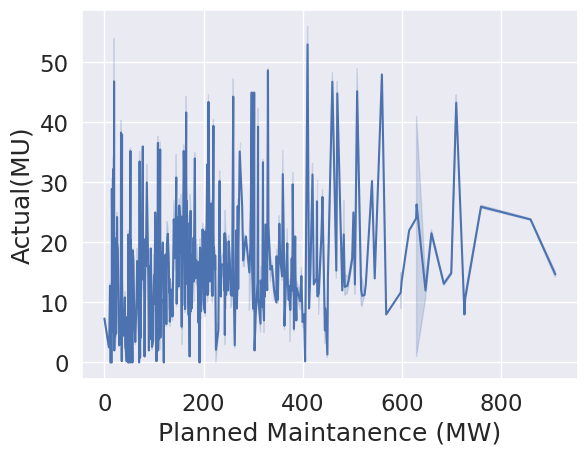

In [ ]:
sns.lineplot(x='Planned Maintanence (MW)', y='Actual(MU)', data=data);

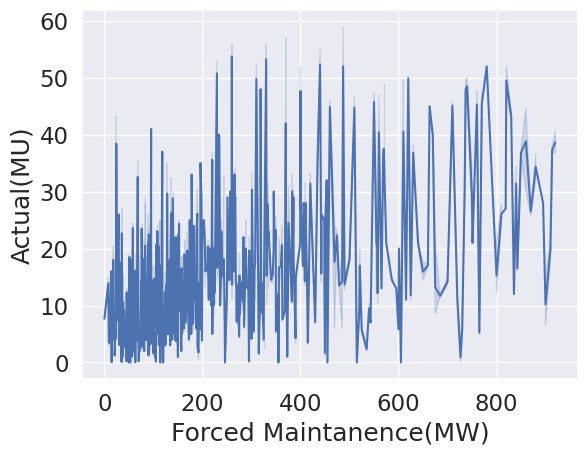

In [ ]:
sns.lineplot(x='Forced Maintanence(MW)', y='Actual(MU)', data=data);

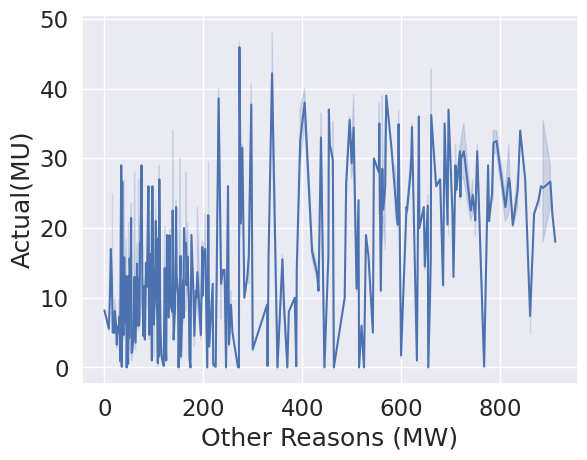

In [ ]:
sns.lineplot(x='Other Reasons (MW)', y='Actual(MU)', data=data);

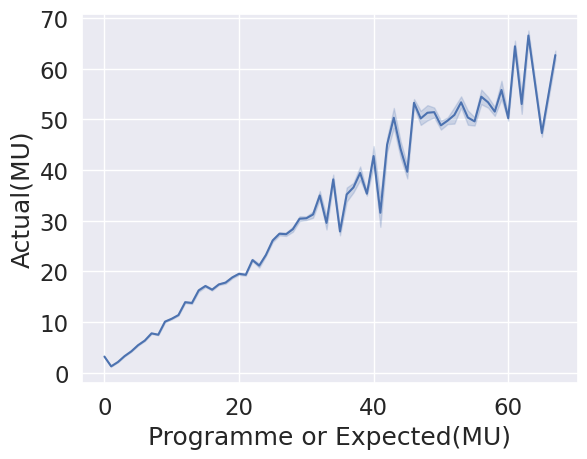

In [ ]:
sns.lineplot(x='Programme or Expected(MU)', y='Actual(MU)', data=data);

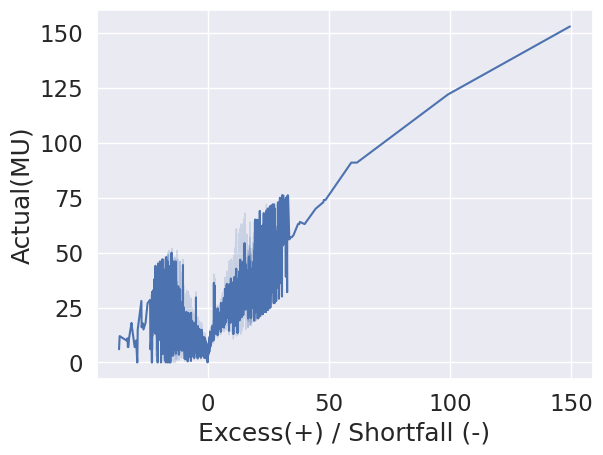

In [ ]:
sns.lineplot(x='Excess(+) / Shortfall (-)', y='Actual(MU)', data=data);

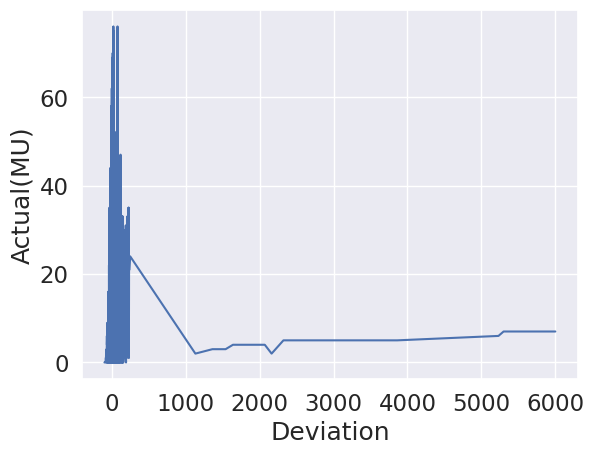

In [ ]:
sns.lineplot(x='Deviation', y='Actual(MU)', data=data);

##Correlation Plot

<ipython-input-11-cc963e60319d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(data.corr(),annot=True)


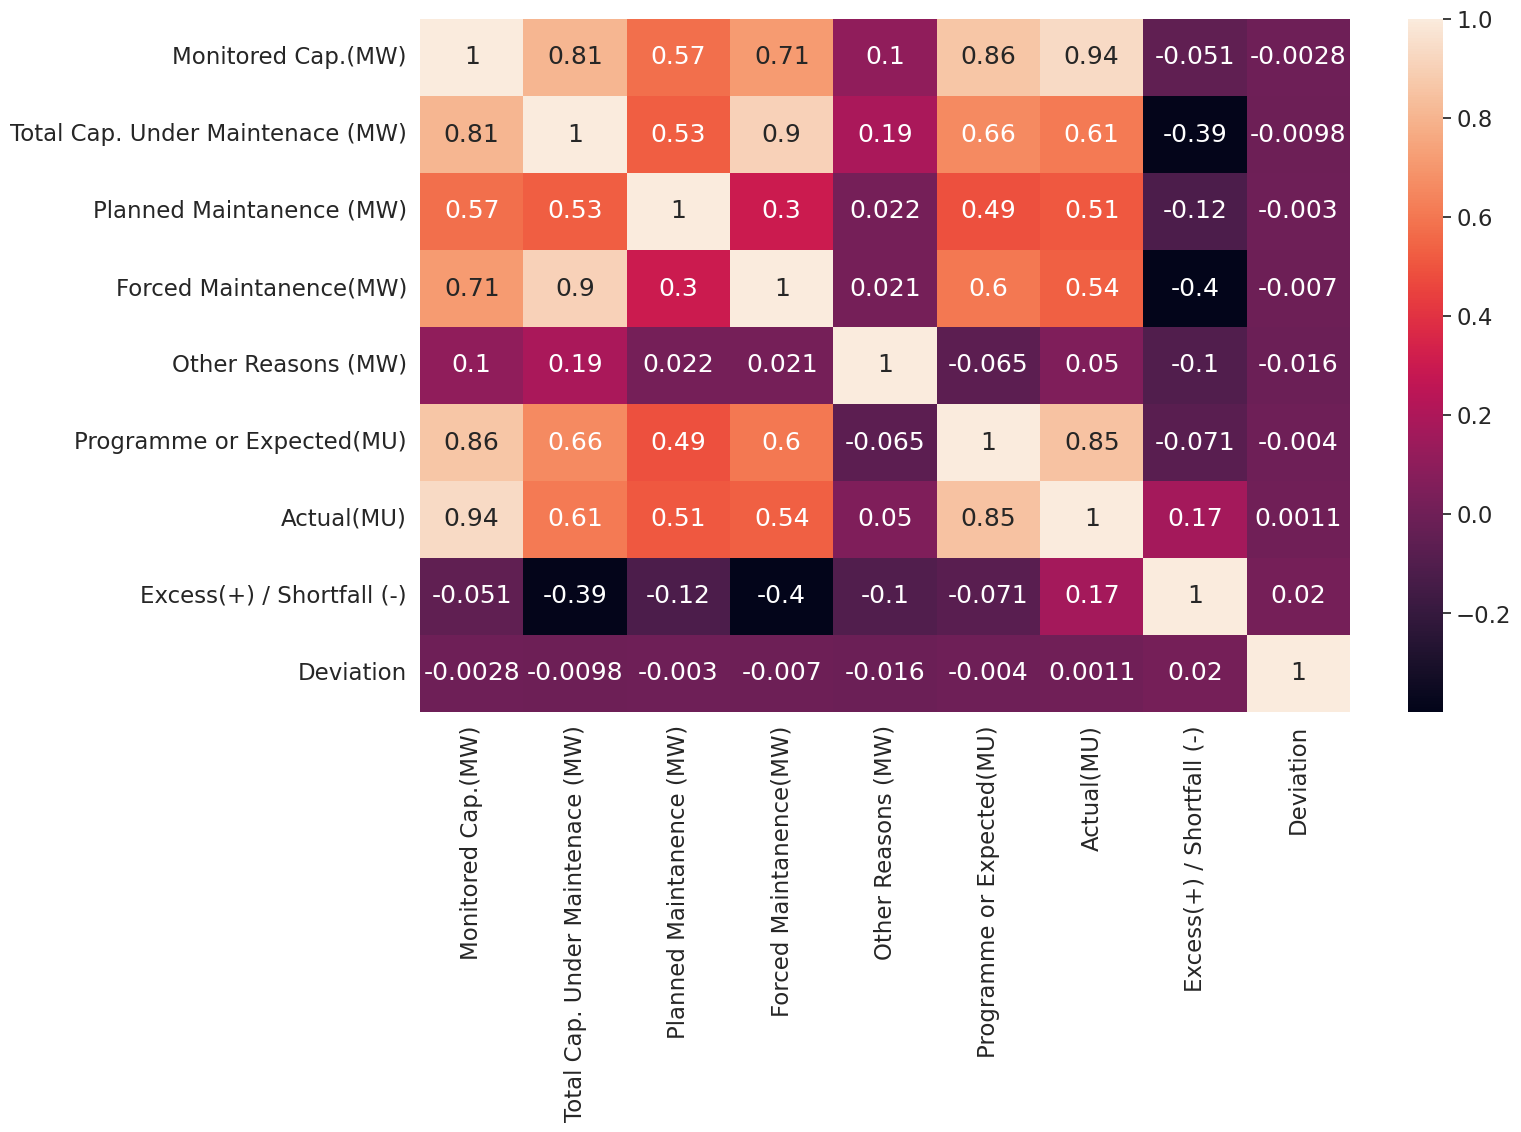

In [ ]:
plt.figure(figsize = (15,9))
ax=sns.heatmap(data.corr(),annot=True)

##Pie Chart

<function matplotlib.pyplot.show(close=None, block=None)>

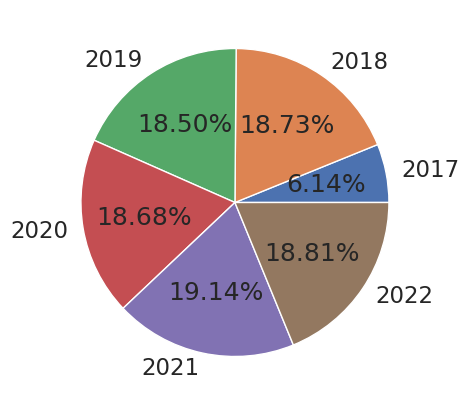

In [ ]:
plt.figure(figsize = (5,5))

i = data.groupby("Year")["Actual(MU)"].count()
i

plt.pie(i, labels=i.index, autopct="%.2f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

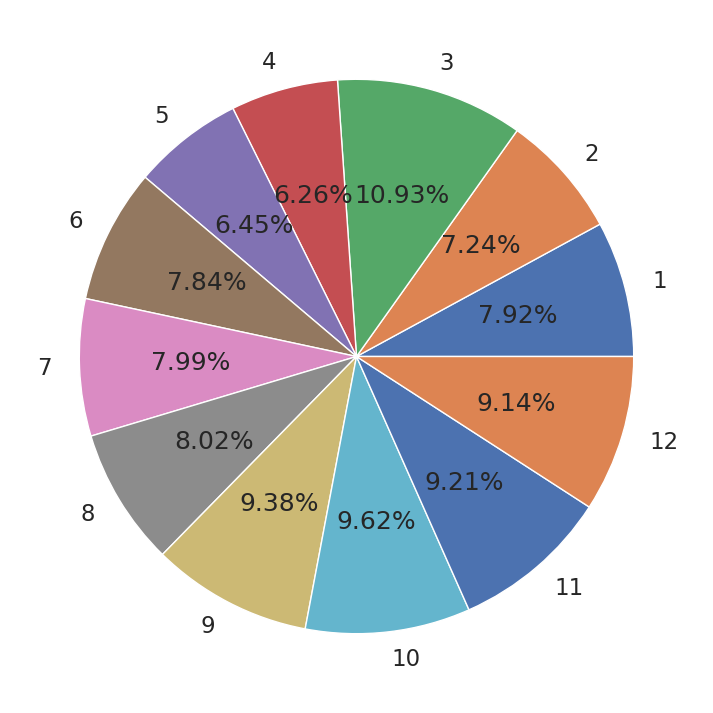

In [ ]:
plt.figure(figsize = (9,9))

j = data.groupby("Month")["Actual(MU)"].count()
j

plt.pie(j, labels=j.index, autopct="%.2f%%")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

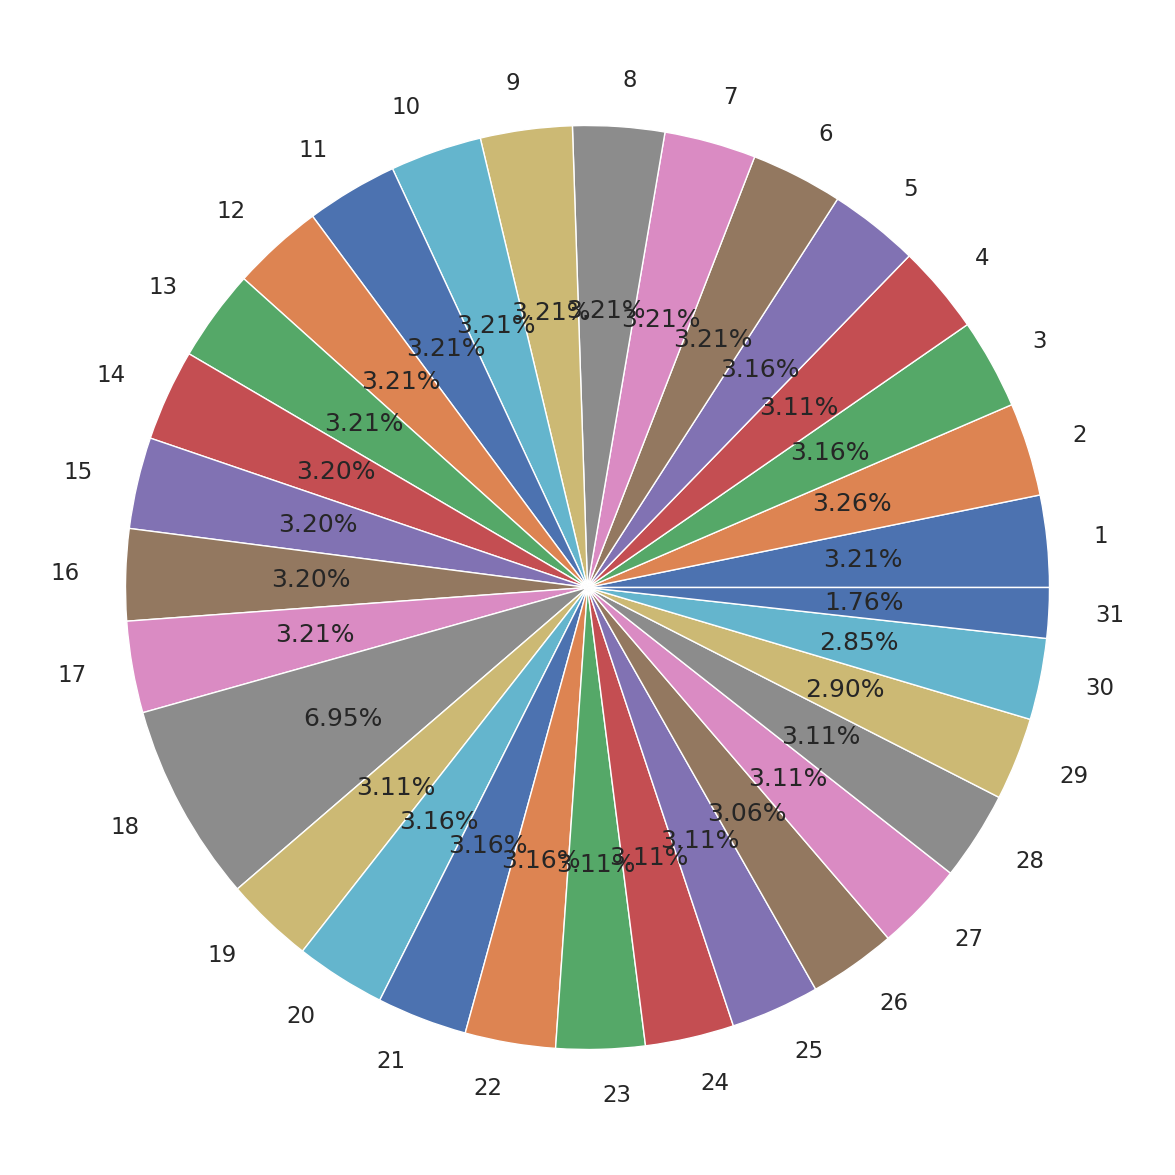

In [ ]:
plt.figure(figsize = (15,15))

k = data.groupby("Day")["Actual(MU)"].count()
k

plt.pie(k, labels=k.index, autopct="%.2f%%")
plt.show

#DUMMIFICATION

In [ ]:
data1 = pd.get_dummies(data, columns=["Power Station"])

In [ ]:
data1.drop('Dates', axis=1, inplace=True)

In [ ]:
data1

Monitored Cap.(MW)  Total Cap. Under Maintenace (MW)  \
6                  1252.15                            334.00   
8                   192.00                              0.00   
9                   330.00                              0.00   
13                  100.00                            100.00   
14                  100.00                              0.00   
...                    ...                               ...   
345264              600.00                              0.00   
345265              429.35                             77.15   
345266               36.00                              0.00   
345268              137.00                             32.00   
345270              105.00                             35.00   

        Planned Maintanence (MW)  Forced Maintanence(MW)  Other Reasons (MW)  \
6                          258.0                   76.00                   0   
8                            0.0                    0.00                   0   
9                            0.0                    0.00                   0   
13                           0.0                  100.00                   0   
14                           0.0                    0.00                   0   
...                          ...                     ...                 ...   
345264                       0.0                    0.00                   0   
345265                       0.0                   57.15                  20   
345266                       0.0                    0.00                   0   
345268                       0.0                    0.00                  32   
345270                       0.0                   35.00                   0   

        Programme or Expected(MU)  Actual(MU)  Excess(+) / Shortfall (-)  \
6                              19          19                       0.11   
8                               2           3                       1.05   
9                               6           8                       1.37   
13                              0           0                       0.00   
14                              1           2                       0.58   
...                           ...         ...                        ...   
345264                          0           6                       0.53   
345265                          0           5                       1.58   
345266                          0           0                       0.00   
345268                          0           1                       0.29   
345270                          0           0                      -0.72   

        Deviation  Year  ...  Power Station_172  Power Station_173  \
6             0.0  2017  ...                  0                  0   
8             0.0  2017  ...                  0                  0   
9             0.0  2017  ...                  0                  0   
13            0.0  2017  ...                  0                  0   
14            0.0  2017  ...                  0                  0   
...           ...   ...  ...                ...                ...   
345264        0.0  2022  ...                  0                  0   
345265        0.0  2022  ...                  0                  0   
345266        0.0  2022  ...                  0                  0   
345268        0.0  2022  ...                  0                  0   
345270        0.0  2022  ...                  0                  0   

        Power Station_174  Power Station_175  Power Station_176  \
6                       0                  0                  0   
8                       0                  0                  0   
9                       0                  0                  0   
13                      0                  0                  0   
14                      0                  0                  0   
...                   ...                ...                ...   
345264                  0                  0           

In [ ]:
for i in range(data1.shape[1]):
    print(data1.iloc[:,i].unique())

[1252.15  192.    330.    100.     70.    225.    540.      0.     24.
   86.    108.    246.     45.    655.     34.    515.    120.    660.
  270.    500.    388.     48.    300.     63.    600.     35.    135.
   32.5   119.8    25.2   174.    220.    464.    445.     36.8   106.
   52.8   330.5   105.7   250.    200.    370.     40.05  210.     96.
   99.    150.    240.    423.45   36.    322.    169.5   105.   2235.4
 1200.   1080.    447.    550.   1500.   2220.   2004.5  1740.   1125.
  350.    400.   1312.   1300.   1400.    726.6  2041.46 1285.    325.
  862.   2720.   1320.    450.   1520.   1980.   1820.   1840.   2700.
 1147.5   272.    768.    860.    742.    716.   3320.    208.    610.
 1050.    455.   1912.02  388.45  193.    110.   1342.   2340.   1000.
  460.   2562.25 1458.   1452.   1040.    358.45  428.2    97.   1427.
 2016.46  750.   1967.08 1370.     90.    777.   1350.    428.21  930.
 2100.4  2920.3  1577.    464.35 1727.    119.81  429.35  888.   1345.
  113

In [ ]:
for i in range(data1.shape[1]):
    print(data1.iloc[:,i].value_counts())

0.0       19503
100.0      6091
300.0      5930
600.0      5921
220.0      5783
          ...  
716.0         2
742.0         2
2700.0        2
2720.0        2
1944.5        2
Name: Monitored Cap.(MW), Length: 140, dtype: int64
0.00      88188
300.00     5723
220.00     5453
100.00     2672
150.00     2656
          ...  
272.50        1
598.50        1
465.50        1
218.50        1
87.11         1
Name: Total Cap. Under Maintenace (MW), Length: 859, dtype: int64
0.0      150866
250.0       635
52.8        541
150.0       447
35.0        394
          ...  
260.5         1
245.5         1
485.0         1
249.5         1
81.0          1
Name: Planned Maintanence (MW), Length: 232, dtype: int64
0.00      126710
300.00      5112
270.00      2374
135.00      2332
150.00      2289
           ...  
185.50         1
58.20          1
156.99         1
176.00         1
172.37         1
Name: Forced Maintanence(MW), Length: 282, dtype: int64
0      150625
220       933
48        413
135       3

In [ ]:
data1.shape

(159635, 176)

In [ ]:
data1.isnull().sum()

Monitored Cap.(MW)                  0
Total Cap. Under Maintenace (MW)    0
Planned Maintanence (MW)            0
Forced Maintanence(MW)              0
Other Reasons (MW)                  0
                                   ..
Power Station_177                   0
Power Station_178                   0
Power Station_179                   0
Power Station_180                   0
Power Station_181                   0
Length: 176, dtype: int64

In [ ]:
print(data['Power Station'].unique())

[  6   8   9  13  14  15  16  17  19  20  25  26  27  46  48  50  53  55
  58  59  61  67  71  72  74  76  78  79  80  82  87  88  90  95  98 100
 101 102 104  60 106 108 110 112 113 114 117 118 119 123 126 127 128 129
 137 138 140 141 142 143 147 148  84 152 153 154 155  28  32   0  35  36
  52  83 130  10  38  75  86  91 103 136  22 156  18 151 109 134  29  39
  56  66  69 157  94  62  64   3  23 135  45 158  51  68   1  11  12  30
  31  33  34  47  54  65  70  73  77  85  89  99 105 111 120 121 122 124
 132 144 145 146 149 150  37  40 159 116 160 131 161 163 164  21 125  24
 162 115 107 167  57   2 170 171 168 172 169 173 174 175 177 176 178 181
 180 179]


In [ ]:
data1.corr()

Monitored Cap.(MW)  \
Monitored Cap.(MW)                          1.000000   
Total Cap. Under Maintenace (MW)            0.449746   
Planned Maintanence (MW)                    0.360248   
Forced Maintanence(MW)                      0.152278   
Other Reasons (MW)                          0.090520   
...                                              ...   
Power Station_177                           0.064312   
Power Station_178                          -0.011011   
Power Station_179                           0.003909   
Power Station_180                           0.015661   
Power Station_181                          -0.008405   

                                  Total Cap. Under Maintenace (MW)  \
Monitored Cap.(MW)                                        0.449746   
Total Cap. Under Maintenace (MW)                          1.000000   
Planned Maintanence (MW)                                  0.265144   
Forced Maintanence(MW)                                    0.370311   
Other Reasons (MW)                                        0.350950   
...                                                            ...   
Power Station_177                                         0.018491   
Power Station_178                                        -0.008424   
Power Station_179                                        -0.004424   
Power Station_180                                        -0.013089   
Power Station_181                                         0.003688   

                                  Planned Maintanence (MW)  \
Monitored Cap.(MW)                                0.360248   
Total Cap. Under Maintenace (MW)                  0.265144   
Planned Maintanence (MW)                          1.000000   
Forced Maintanence(MW)                            0.005334   
Other Reasons (MW)                               -0.020125   
...                                                    ...   
Power Station_177                                 0.004246   
Power Station_178                                -0.002348   
Power Station_179                                -0.001233   
Power Station_180                                -0.003648   
Power Station_181                                -0.007480   

                                  Forced Maintanence(MW)  Other Reasons (MW)  \
Monitored Cap.(MW)                              0.152278            0.090520   
Total Cap. Under Maintenace (MW)                0.370311            0.350950   
Planned Maintanence (MW)                        0.005334           -0.020125   
Forced Maintanence(MW)                          1.000000           -0.074627   
Other Reasons (MW)                             -0.074627            1.000000   
...                                                  ...                 ...   
Power Station_177                               0.063819           -0.006242   
Power Station_178                              -0.005633           -0.002616   
Power Station_179                              -0.002959           -0.001374   
Power Station_180                              -0.008753           -0.004065   
Power Station_181                               0.006348           -0.018696   

                                  Programme or Expected(MU)  Actual(MU)  \
Monitored Cap.(MW)                                 0.705155    0.762060   
Total Cap. Under Maintenace (MW)                   0.026124    0.013030   
Planned Maintanence (MW)                           0.204589    0.215938   
Forced Maintanence(MW)                             0.051190    0.047946   
Other Reasons (MW)                                -0.091447   -0.064895   
...                                                     ...         ...   
Power Station_177                                  0.029590    0.112644   
Power Station_178                                 -0.006472   -0.007168   
Power Station_179                                 -0.003399    0.005651   
Power Station_180                                 -0.007322    0

In [ ]:
X = data1.drop('Actual(MU)',axis=1)
y = data1['Actual(MU)']

#K-FOLD CLASSIFICATION

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.dtypes)
print(y_train.dtypes)

Monitored Cap.(MW)                  float64
Total Cap. Under Maintenace (MW)    float64
Planned Maintanence (MW)            float64
Forced Maintanence(MW)              float64
Other Reasons (MW)                    int64
                                     ...   
Power Station_177                     uint8
Power Station_178                     uint8
Power Station_179                     uint8
Power Station_180                     uint8
Power Station_181                     uint8
Length: 175, dtype: object
int64


In [ ]:
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

linreg=LinearRegression()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

In [ ]:
scores = cross_val_score(linreg, X, y, scoring='neg_mean_absolute_error')

In [ ]:
mean(absolute(scores))

0.9341282593576612

#LINEAR REGRESSION

In [ ]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm1.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.2009817870636148

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9367012726558095

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.6367363276402995

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.936631804784537

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

nan

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1.4423572528585136

In [ ]:
print(lm1.intercept_)
print(lm1.coef_)

-298.03407729748074
[ 1.09669421e-02 -3.71017194e-03 -5.15449688e-03 -9.64897078e-04
 -2.96631203e-04  3.09533275e-01  8.80577548e-01 -2.50495072e-03
  1.46459269e-01  2.25755564e-02  2.18863433e-03 -8.32309537e+00
 -2.74567759e+01 -1.22715512e+00 -5.17506039e+00 -1.50449328e+00
  1.09249511e+00  6.19016706e-01  1.26299396e+00  3.14411961e+00
  1.20568067e+00  1.40797381e+00  1.36807965e+00  1.55375846e+00
  8.50373900e-01  9.73508386e-01 -7.61152558e+00  1.90986665e+00
  1.64212084e+00  2.92736261e+00 -3.56338600e-02  5.25719610e+00
  1.41226130e+00  1.48036400e+00  2.06028470e+00  1.49069213e+00
  1.04811374e+00  2.30742685e+00 -1.69621343e+00 -5.29659752e+00
  1.35215197e+00  2.12276451e+00 -1.93412387e+01  2.78679076e+00
  3.89668825e+00 -9.48610227e+00  9.39553035e-01 -5.58915760e+00
 -2.22677939e+00  2.50478020e+00  4.66071569e-01  1.66778353e+00
  1.54355115e+00 -3.10808484e+00  3.06759122e+00  4.63684596e-01
  1.62508386e+00 -4.56221505e+00 -1.51338103e+00  1.46156785e+00
  4.5

#BAGGING

##BAGGING REGRESSION

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
clf = BaggingRegressor(n_estimators = 100, random_state = 42)

In [ ]:
a = clf.fit(X_train, y_train)

In [ ]:
y_pred = a.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2682868381864547

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9968412091584725

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

-inf

In [ ]:
mae = metrics.mean_absolute_error(y_test, a.predict(X_test))
mae

0.061121621198358754

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9968377425093824

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.07197782754408494

##DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
b = tree.fit(X_train, y_train)

In [ ]:
y_pred = b.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.5793532362351812

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.8905336380110629

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

-inf

In [ ]:
mae = metrics.mean_absolute_error(y_test, b.predict(X_test))
mae

0.8957348217481216

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.8904135029710334

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

2.49435664480654

##RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [ ]:
c = rf.fit(X_train, y_train)

In [ ]:
y_pred = c.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2708471343779928

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9967806319794873

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

-inf

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.06140852569925141

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9967770988493185

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.0733581702007705

#BOOSTING

##ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01, random_state=42)

In [ ]:
d = adaboost.fit(X_train, y_train)

In [ ]:
y_pred=d.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

1.3778976916515735

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9166786916521579

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

-inf

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.798147162963752

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9165872497833335

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1.8986020486587347

##GRADIENT BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost= GradientBoostingRegressor(max_depth=5,learning_rate=0.01,random_state=42,n_estimators=1000)


In [ ]:
e = grad_boost.fit(X_train, y_train)

In [ ]:
y_pred=e.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.49816839385271217

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9891088315185653

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

nan

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.21485596134020393

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9890968788882074

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.24817174863379096

##XGBOOST

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xgb_boost=xgb.XGBRegressor(random_state=42,learning_rate=0.01,n_estimators=700)

In [ ]:
f = xgb_boost.fit(X_train, y_train)

In [ ]:
y_pred=f.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.4734198944404647

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.9901640764578011

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

nan

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mae

0.1980422044252334

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.990153281917387

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.22412639645202073

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
g=model.fit(X_train,y_train)

In [ ]:
y_pred=g.predict(X_test)

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.7611729240142814

In [ ]:
r2=r2_score(y_test,y_pred)
r2

0.974573370284925

In [ ]:
mpe = np.mean((y_test - y_pred) / y_test) * 100
mpe

-inf

In [ ]:
mae = metrics.mean_absolute_error(y_test, g.predict(X_test))
mae

0.200895793528988

In [ ]:
adj_r2= 1-((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
adj_r2

0.9745454655558088

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

0.579384220252451